<a href="https://colab.research.google.com/github/Pramathesh1/Capstone-2-BikeSharingPrediction-Regression/blob/main/Team_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m`
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [2]:
# importing relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_text, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor 
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.inspection import permutation_importance

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# loading the data into pandas dataframe
file_location = '/content/drive/MyDrive/Colab Notebooks/Almabetter/Regression Capstone Project/Copy of SeoulBikeData.csv'
df = pd.read_csv(file_location, encoding='latin-1')

# Preliminary Data Exploration

In this section we go through the dataset to get insights and to know its features.

In [6]:
# printing the dataset
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0     01/12/2017                254     0             -5.2           37   
1     01/12/2017                204     1             -5.5           38   
2     01/12/2017                173     2             -6.0           39   
3     01/12/2017                107     3             -6.2           40   
4     01/12/2017                 78     4             -6.0           36   
...          ...                ...   ...              ...          ...   
8755  30/11/2018               1003    19              4.2           34   
8756  30/11/2018                764    20              3.4           37   
8757  30/11/2018                694    21              2.6           39   
8758  30/11/2018                712    22              2.1           41   
8759  30/11/2018                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day  
0     No Holiday             Yes  
1     No Holiday             Yes  
2     No Holiday             Yes  
3     No Holiday             Yes  
4     No Holiday             Yes  
...          ...             ...  
8755  No Holiday             Yes  
8756  No Holiday             Yes  
8757  No Holiday             Yes  
8758  No Holiday             Yes  
8759  No Holiday             Yes  

[8760 rows x 14 columns]

In [ ]:
# print all columns in the dataset
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [ ]:
# dataset dimensions
df.shape

(8760, 14)

The dataset has 14 columns and 8760 rows. 8760 rows mean we have data for 365 days, from 1 December 2017 to 30 November 2018, for every hour in a day as 365*24 = 8760. 

In [ ]:
# getting statistical info on the columns
df.describe(include = 'all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

We see the data type of the variables. We note here that the date variable is string type.

# Data Wrangling

### Checking Null values

In [ ]:
# checking null values in each column
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

The dataset has no null values in any column.

### Checking duplicate rows

Here, duplicate rows are checked and if found are removed from the dataset

In [ ]:
df.duplicated().sum()

0

No duplicate rows found so we proceed.

### Extracting Month and Day of the week from Date column

As noted before, Date column has string datatype. So we convert that to datetime object using pandas datetime module.

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

Date variable is converted to datetime object. We can extract month and day from a particular date.

In [ ]:
df['Date'][1].month_name()

'December'

In [ ]:
df['Date'][1].day_name()

'Friday'

In [ ]:
df['Date'][1]

Timestamp('2017-12-01 00:00:00')

Creating Month and Day of the week columns from Date variable.

In [ ]:
df['Month'] = df['Date'].apply(lambda x: x.month_name())
df['Day of Week'] = df['Date'].apply(lambda x: x.day_name())

In [ ]:
df.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day     Month Day of Week  
0             Yes  December      Friday  
1             Yes  December      Friday  
2             Yes  December      Friday  
3             Yes  December      Friday  
4             Yes  December      Friday

### Removing Non Functioning days

The "Functioning Day" column gives the info whether the rental service was available for that day. The rows that have the value "No" for that column means the rental service was unavailable and so the Rented Bike Count is 0 for all those rows. So we remove those rows (295 in number) as these don't give the absolute picture of other features affecting the output and so may negatively affect model predictions.`

In [ ]:
# data on non functioning day
df[df['Functioning Day'] == 'No']

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
3144 2018-04-11                  0     0             14.4           82   
3145 2018-04-11                  0     1             13.6           81   
3146 2018-04-11                  0     2             12.7           80   
3147 2018-04-11                  0     3             11.6           81   
3148 2018-04-11                  0     4             10.2           83   
...         ...                ...   ...              ...          ...   
8251 2018-11-09                  0    19             11.9           71   
8252 2018-11-09                  0    20             11.9           72   
8253 2018-11-09                  0    21             11.4           74   
8254 2018-11-09                  0    22             11.2           75   
8255 2018-11-09                  0    23             10.9           76   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
3144               4.6              1041                       11.3   
3145               3.6               886                       10.3   
3146               3.9               885                        9.3   
3147               3.1               687                        8.4   
3148               3.5               554                        7.4   
...                ...               ...                        ...   
8251               2.7               589                        6.7   
8252               2.5               526                        7.0   
8253               1.9               498                        6.9   
8254               1.7               478                        6.9   
8255               1.2               456                        6.8   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
3144                      0.0           0.0            0.0  Spring   
3145                      0.0           0.0            0.0  Spring   
3146                      0.0           0.0            0.0  Spring   
3147                      0.0           0.0            0.0  Spring   
3148                      0.0           0.0            0.0  Spring   
...                       ...           ...            ...     ...   
8251                      0.0           0.0            0.0  Autumn   
8252                      0.0           0.0            0.0  Autumn   
8253                      0.0           0.0            0.0  Autumn   
8254                      0.0           0.0            0.0  Autumn   
8255                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day     Month Day of Week  
3144  No Holiday              No     April   Wednesday  
3145  No Holiday              No     April   Wednesday  
3146  No Holiday              No     April   Wednesday  
3147  No Holiday              No     April   Wednesday  
3148  No Holiday              No     April   Wednesday  
...          ...             ...       ...         ...  
8251  No Holiday              No  November      Friday  
8252  No Holiday              No  November      Friday  
8253  No Holiday              No  November      Friday  
8254  No Holiday              No  November      Friday  
8255  No Holiday              No  November      Friday  

[295 rows x 16 columns]

In [ ]:
# Sum of bikes rented when on non functioning days
df[df['Functioning Day'] == 'No']['Rented Bike Count'].sum()

0

In [ ]:
df.drop(df[df['Functioning Day'] == 'No'].index, inplace = True)
df

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0    2017-12-01                254     0             -5.2           37   
1    2017-12-01                204     1             -5.5           38   
2    2017-12-01                173     2             -6.0           39   
3    2017-12-01                107     3             -6.2           40   
4    2017-12-01                 78     4             -6.0           36   
...         ...                ...   ...              ...          ...   
8755 2018-11-30               1003    19              4.2           34   
8756 2018-11-30                764    20              3.4           37   
8757 2018-11-30                694    21              2.6           39   
8758 2018-11-30                712    22              2.1           41   
8759 2018-11-30                584    23              1.9           43   

      Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0                  2.2              2000                      -17.6   
1                  0.8              2000                      -17.6   
2                  1.0              2000                      -17.7   
3                  0.9              2000                      -17.6   
4                  2.3              2000                      -18.6   
...                ...               ...                        ...   
8755               2.6              1894                      -10.3   
8756               2.3              2000                       -9.9   
8757               0.3              1968                       -9.9   
8758               1.0              1859                       -9.8   
8759               1.3              1909                       -9.3   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons  \
0                         0.0           0.0            0.0  Winter   
1                         0.0           0.0            0.0  Winter   
2                         0.0           0.0            0.0  Winter   
3                         0.0           0.0            0.0  Winter   
4                         0.0           0.0            0.0  Winter   
...                       ...           ...            ...     ...   
8755                      0.0           0.0            0.0  Autumn   
8756                      0.0           0.0            0.0  Autumn   
8757                      0.0           0.0            0.0  Autumn   
8758                      0.0           0.0            0.0  Autumn   
8759                      0.0           0.0            0.0  Autumn   

         Holiday Functioning Day     Month Day of Week  
0     No Holiday             Yes  December      Friday  
1     No Holiday             Yes  December      Friday  
2     No Holiday             Yes  December      Friday  
3     No Holiday             Yes  December      Friday  
4     No Holiday             Yes  December      Friday  
...          ...             ...       ...         ...  
8755  No Holiday             Yes  November      Friday  
8756  No Holiday             Yes  November      Friday  
8757  No Holiday             Yes  November      Friday  
8758  No Holiday             Yes  November      Friday  
8759  No Holiday             Yes  November      Friday  

[8465 rows x 16 columns]

In [ ]:
df['Functioning Day'].unique()

array(['Yes'], dtype=object)

Now the dataframe is free from non functioning days. We can also see the number of rows has reduced from 8760 to 8465.

# Exploratory Data Analysis

In this section, we visualize the data and explore the variables before going for model building.

## Boxplot for Rented Bike Count to check outliers

In [ ]:
numeric_cols = np.array(df.describe().columns)

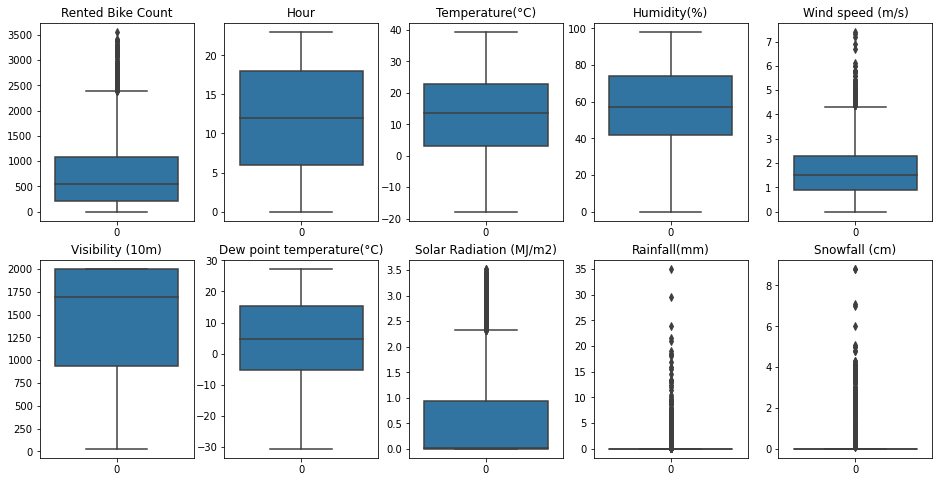

In [ ]:
# Checking for Outliers using Box Plots
n=1
plt.figure(figsize=(16,8))
for col in numeric_cols:
  feature = df[col]
  ax = plt.subplot(2,5,n)
  ax.set_title(col)
  sns.boxplot(feature)
  n+=1
plt.show()

Text(0.5, 0, 'Rented Bike Count')

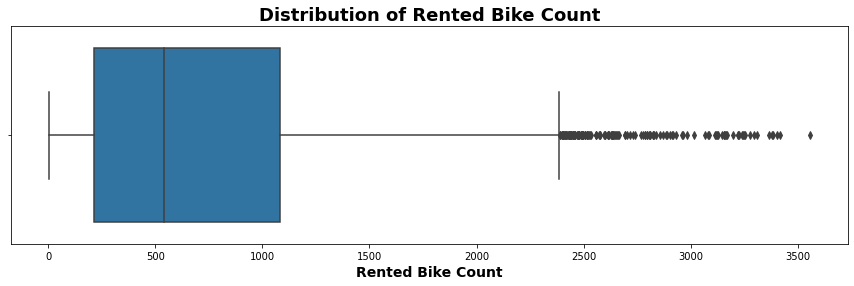

In [ ]:
# plotting boxplot rental bike count
plt.figure(figsize = (15,4))
sns.boxplot(data = df,  x ='Rented Bike Count')
plt.title('Distribution of Rented Bike Count',fontsize = 18, fontweight='bold')
plt.xlabel('Rented Bike Count', fontsize = 14, fontweight='bold')

From the box plot, we can see the outliers in the rental bike count, wind speed and solar radiations. However, dropping those records won’t be wise as these represent natural variations in the population which are called true outliers and not due to measurement errors, data entry or processing errors, or poor sampling. There is reasonable chance of these numbers appearing in the data so these data points need to be retained.

## Rented Bike Count vs Hour of the day

Plotting the average count of bikes rented during the time of the day.

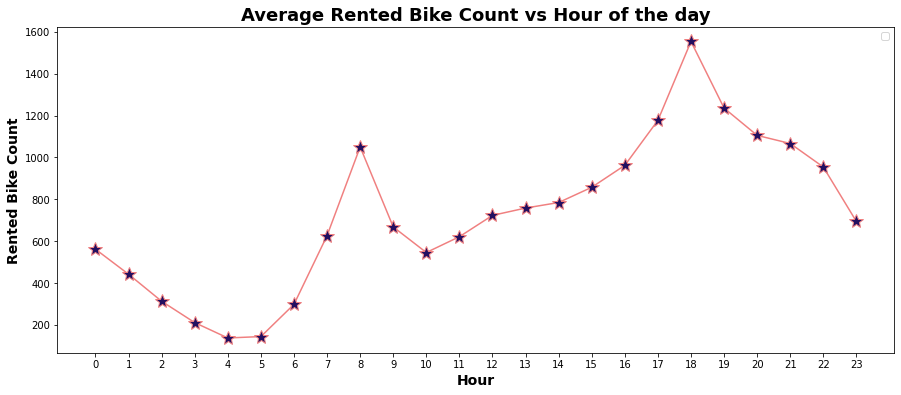

In [ ]:
# grouping by hour of the day and finding the average count per hour
df.groupby(['Hour']).mean()[['Rented Bike Count']].plot(figsize = (15,6), color = 'lightcoral', marker = '*', ms= 15, mfc = '#231061')
# modifying the plot by adding title, labels, xticks, legend
plt.title('Average Rented Bike Count vs Hour of the day',fontsize = 18, fontweight='bold')
plt.xlabel('Hour', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')
plt.xticks(np.arange(0,24,1))
plt.legend([])
plt.show()

There are two peaks in the graph. One is in the morning between 7AM to 9AM and another one is in the evening between 5PM and 8PM. This implies usage of rental bikes increases during the office opening and closing hours. Evenings have higher count as compared to any other time of the day. As night falls, the usage decreases.

## Rented Bike Count vs Holiday

Text(0, 0.5, 'Rented Bike Count')

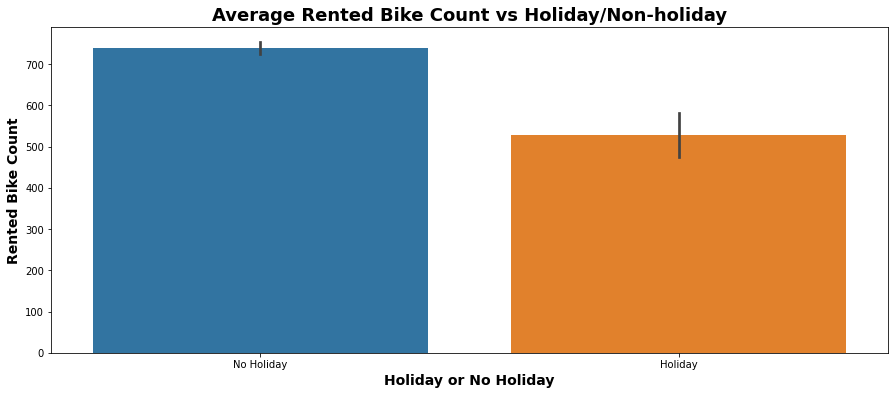

In [ ]:
# plotting the rental bike count for holiday and non-holiday
plt.figure(figsize = (15,6))
sns.barplot(data = df, x = 'Holiday', y ='Rented Bike Count')
plt.title('Average Rented Bike Count vs Holiday/Non-holiday',fontsize = 18, fontweight='bold')
plt.xlabel('Holiday or No Holiday', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')

Text(0, 0.5, 'Rented Bike Count')

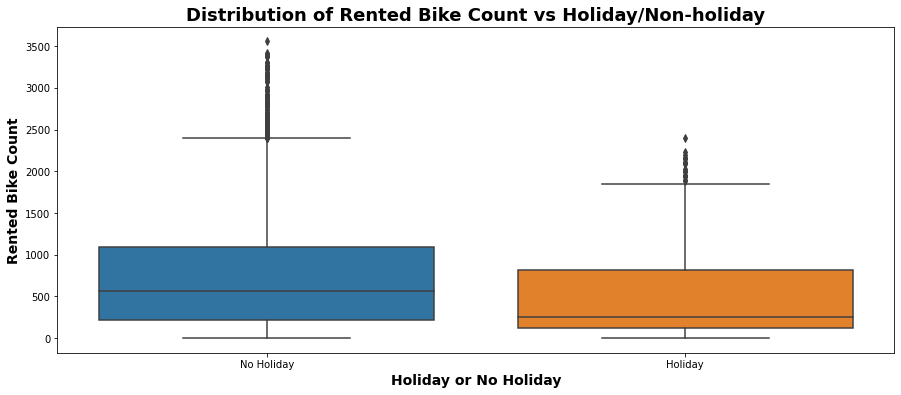

In [ ]:
# plotting boxplot rental bike count for holiday and non-holiday
plt.figure(figsize = (15,6))
sns.boxplot(data = df, x = 'Holiday', y ='Rented Bike Count')
plt.title('Distribution of Rented Bike Count vs Holiday/Non-holiday',fontsize = 18, fontweight='bold')
plt.xlabel('Holiday or No Holiday', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')

The rental bike count on non-holidays or working days is more than that on holidays. Rental bikes are more often used for commuting than for personal use.

## Rented Bike Count vs Day of the Week

Text(0, 0.5, 'Rented Bike Count')

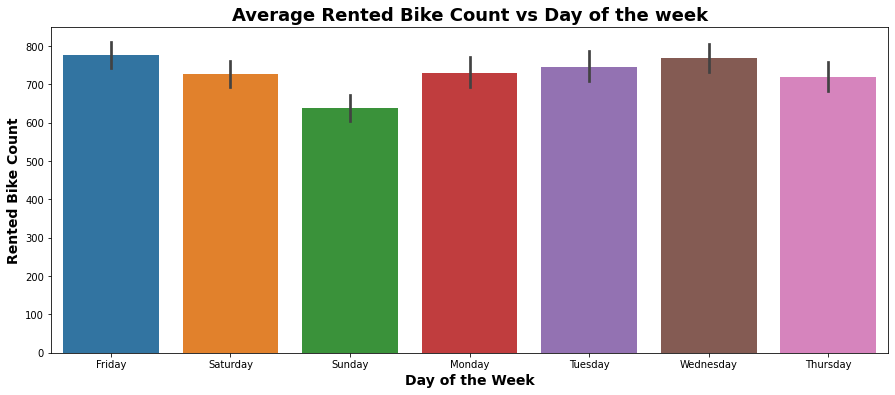

In [ ]:
# plotting average rented bike count per day of the week
plt.figure(figsize = (15,6))
sns.barplot(data = df, x = 'Day of Week', y ='Rented Bike Count')
plt.title('Average Rented Bike Count vs Day of the week',fontsize = 18, fontweight='bold')
plt.xlabel('Day of the Week', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')

Text(0, 0.5, 'Rented Bike Count')

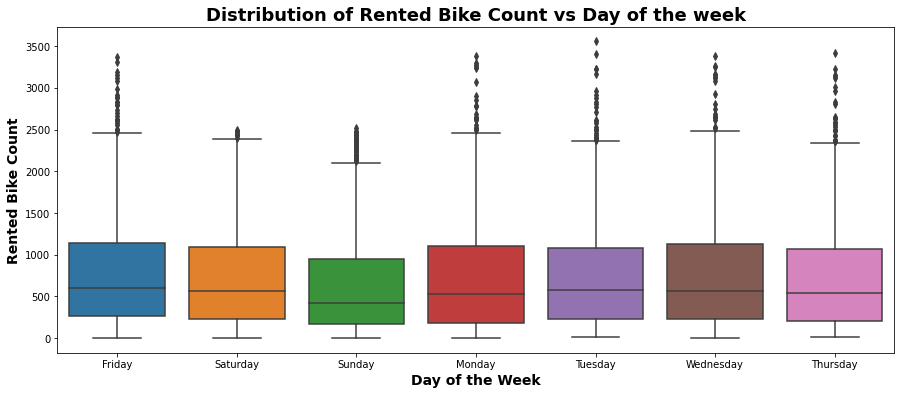

In [ ]:
# plotting boxplot for average rented bike count per day of the week
plt.figure(figsize = (15,6))
sns.boxplot(data = df, x = 'Day of Week', y ='Rented Bike Count')
plt.title('Distribution of Rented Bike Count vs Day of the week',fontsize = 18, fontweight='bold')
plt.xlabel('Day of the Week', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')

The rental bike count is relatively lower on Sunday which is a holiday, which was also evident from the previous graph. All other weekdays has comparable numbers.

## Rented Bike Count vs Seasons

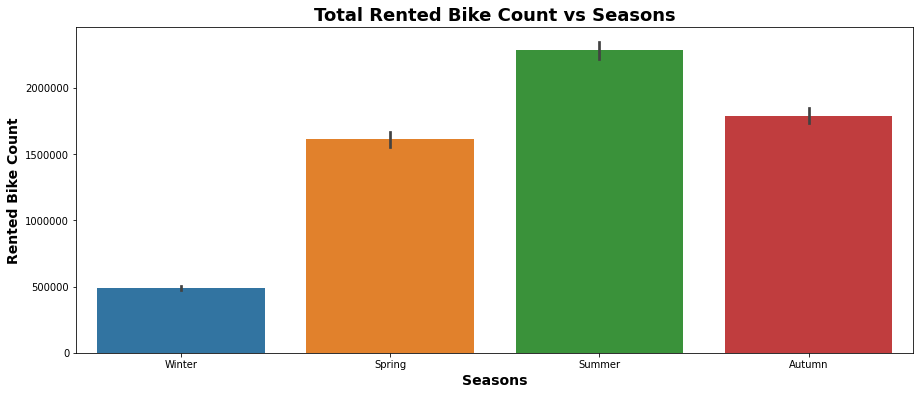

In [ ]:
# plotting average rented bike count per season
plt.figure(figsize = (15,6))
sns.barplot(data = df, x = 'Seasons', y ='Rented Bike Count', estimator = sum)
plt.title('Total Rented Bike Count vs Seasons',fontsize = 18, fontweight='bold')
plt.xlabel('Seasons', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')

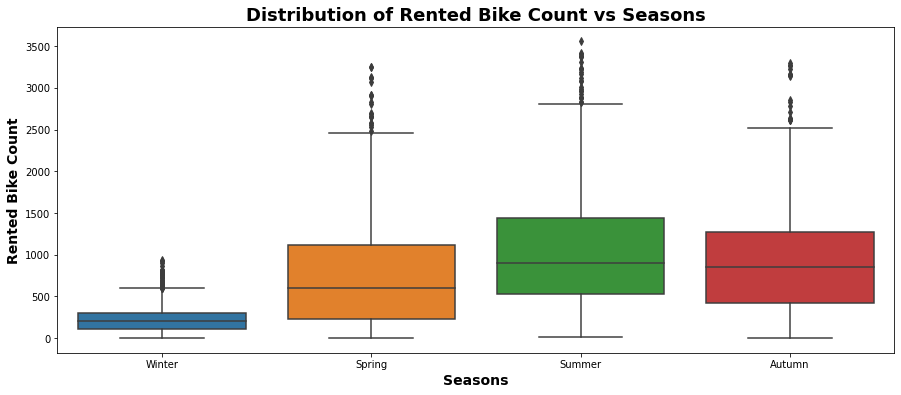

In [ ]:
# plotting boxplot for average rented bike count per season
plt.figure(figsize = (15,6))
sns.boxplot(data = df, x = 'Seasons', y ='Rented Bike Count')
plt.title('Distribution of Rented Bike Count vs Seasons',fontsize = 18, fontweight='bold')
plt.xlabel('Seasons', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')
plt.ticklabel_format(style='plain', axis='y')

Summer season has seen most number of bikes rented. Spring and Autumn also have fair count, however the number is very low for Winter. Seoul has a frosty winter and so people refrain from using bike during Winter.

## Rented Bike Count vs Month of the year

In [ ]:
# importing categorical datatype
from pandas.api.types import CategoricalDtype
cat_month = CategoricalDtype(['January','February','March','April','May','June','July','August'
            ,'September','October','November','December'],ordered=True,)

In [ ]:
# converting the month column into categorical type to order it from January to December
temp_df = df.groupby(['Month']).sum()[['Rented Bike Count']].reset_index()
temp_df['Month'] = temp_df['Month'].astype(cat_month)

In [ ]:
# calculating sum of rental bike count per month
temp_df = temp_df.sort_values('Month').set_index('Month')
temp_df

Rented Bike Count
Month                       
January               150006
February              151833
March                 380594
April                 524227
May                   707088
June                  896887
July                  734460
August                651887
September             673612
October               650675
November              465715
December              185330

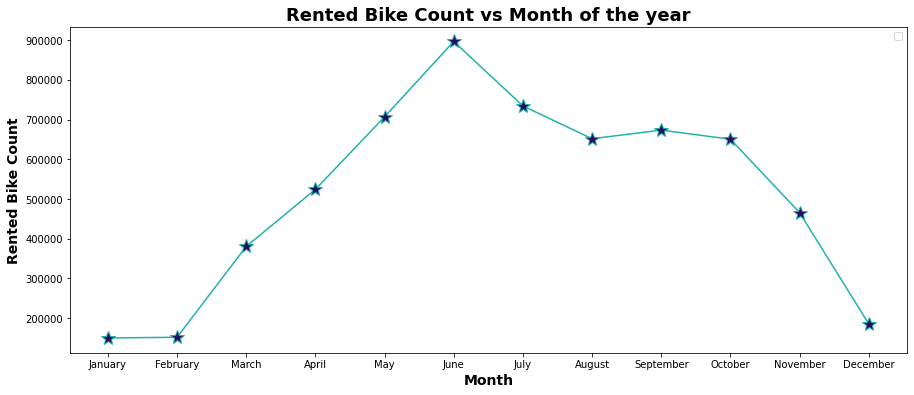

In [ ]:
# plotting rental bike count per month
temp_df.plot(figsize = (15,6), color = 'lightseagreen', marker = '*', ms= 15, mfc = '#231061')
# modifying the plot by adding title, labels, xticks, legend
plt.title('Rented Bike Count vs Month of the year',fontsize = 18, fontweight='bold')
plt.xlabel('Month', fontsize = 14, fontweight='bold')
plt.ylabel('Rented Bike Count', fontsize = 14, fontweight='bold')
plt.xticks(range(0,len(temp_df.index)), temp_df.index)
plt.legend([])
plt.show()

December, January and February have the lowest count of rental bikes which was also evident from the previous plot where Winter season had the lowest count. June sees the maximum rental count which falls in Summer season.

## Regplot

Regplot function plots a scattered plot between the numeric dependent variables and the target variable along with a linear regression model fit. 

In [ ]:
# to extract the numeric features in dataset
numeric_features = list(df.describe().columns)
numeric_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)']

In [ ]:
from google.colab import files

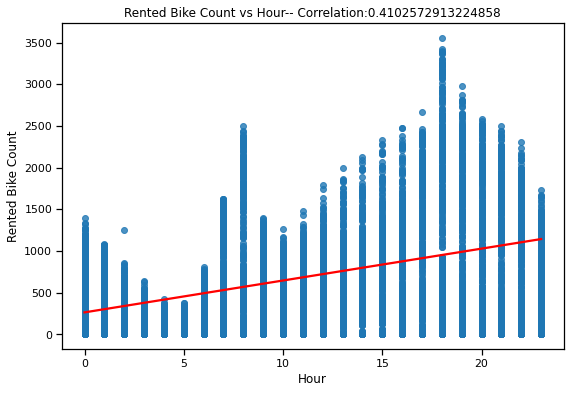

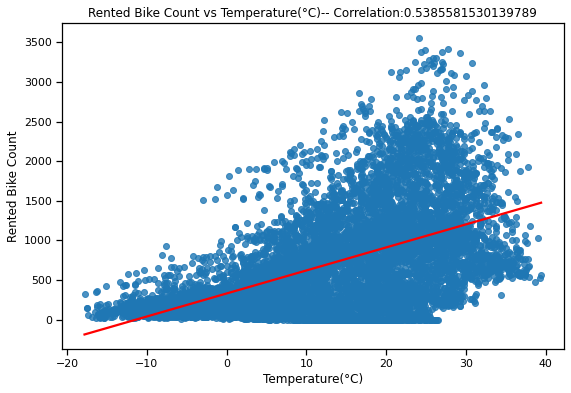

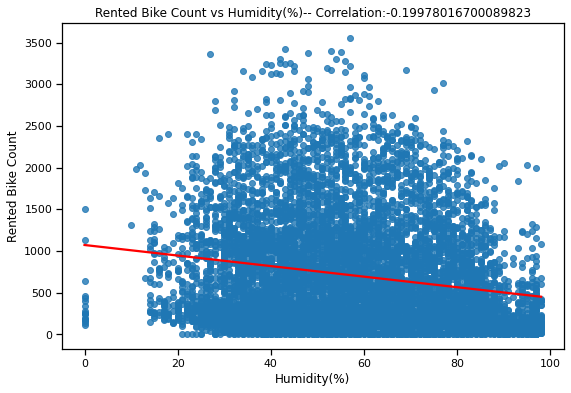

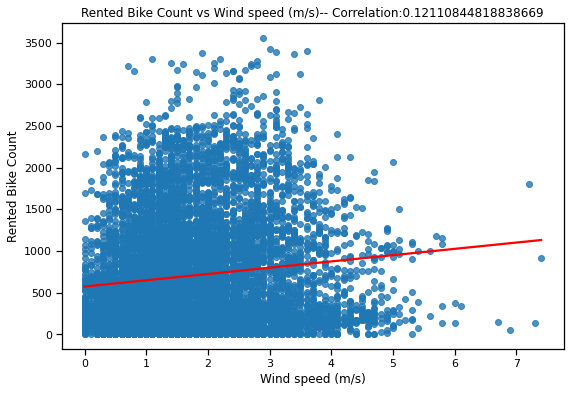

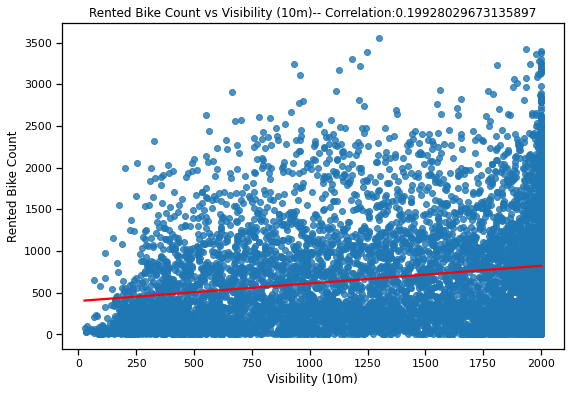

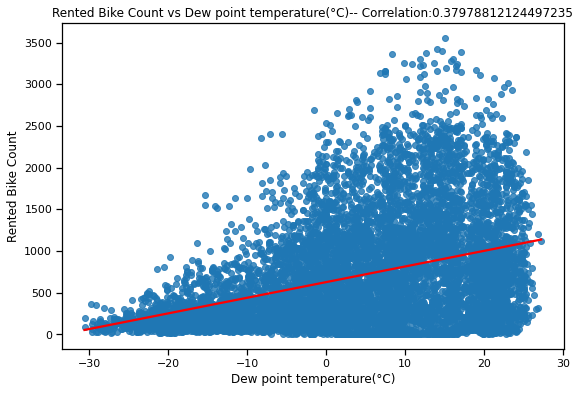

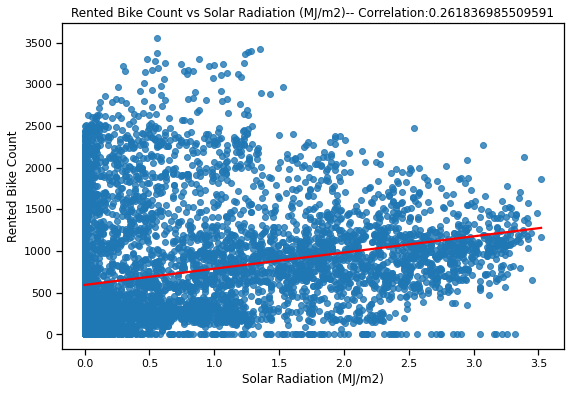

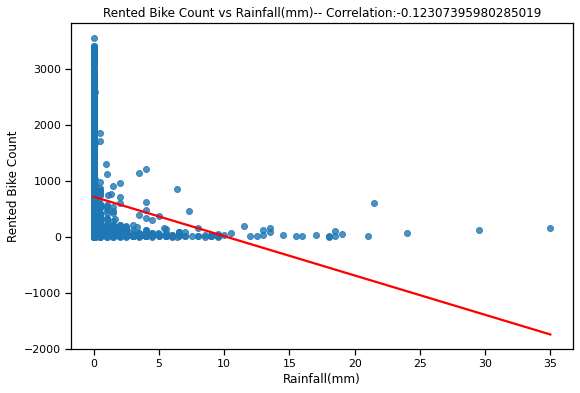

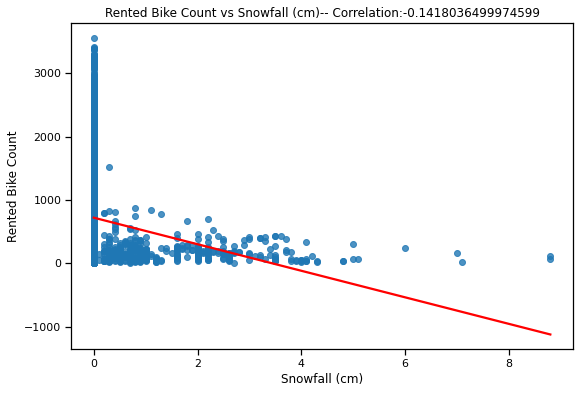

In [ ]:
# for every numeric feature we plot the regreesion plot
for col in numeric_features[1:]:
  plt.figure(figsize = (9,6))
  sns.regplot(data = df, x = col, y = 'Rented Bike Count', ci =None, line_kws={"color": "red"})
  plt.title('Rented Bike Count vs '+ col +'-- Correlation:' + str(df[col].corr(df['Rented Bike Count'])))
  # plt.savefig(f"download_{numeric_features.index(col)}.png")
  # files.download(f'download_{numeric_features.index(col)}.png')
plt.show()

The scatter plot between rented bike count and temperature suggests more the temperature, more the rental count, meaning people prefer hot and sunny day to use bikes. Rainfall and Snowfall slightly affect the rental bike count negatively meaning people avoid taking bikes on rainy and snowy days. Other factors like humidity, visibility, wind speed do not affect the target variable much.

## Pairplot

The Seaborn Pairplot allows us to plot pairwise relationships between numeric variables within a dataset. This creates a nice visualisation and helps us understand the data by summarising a large amount of data in a single figure.

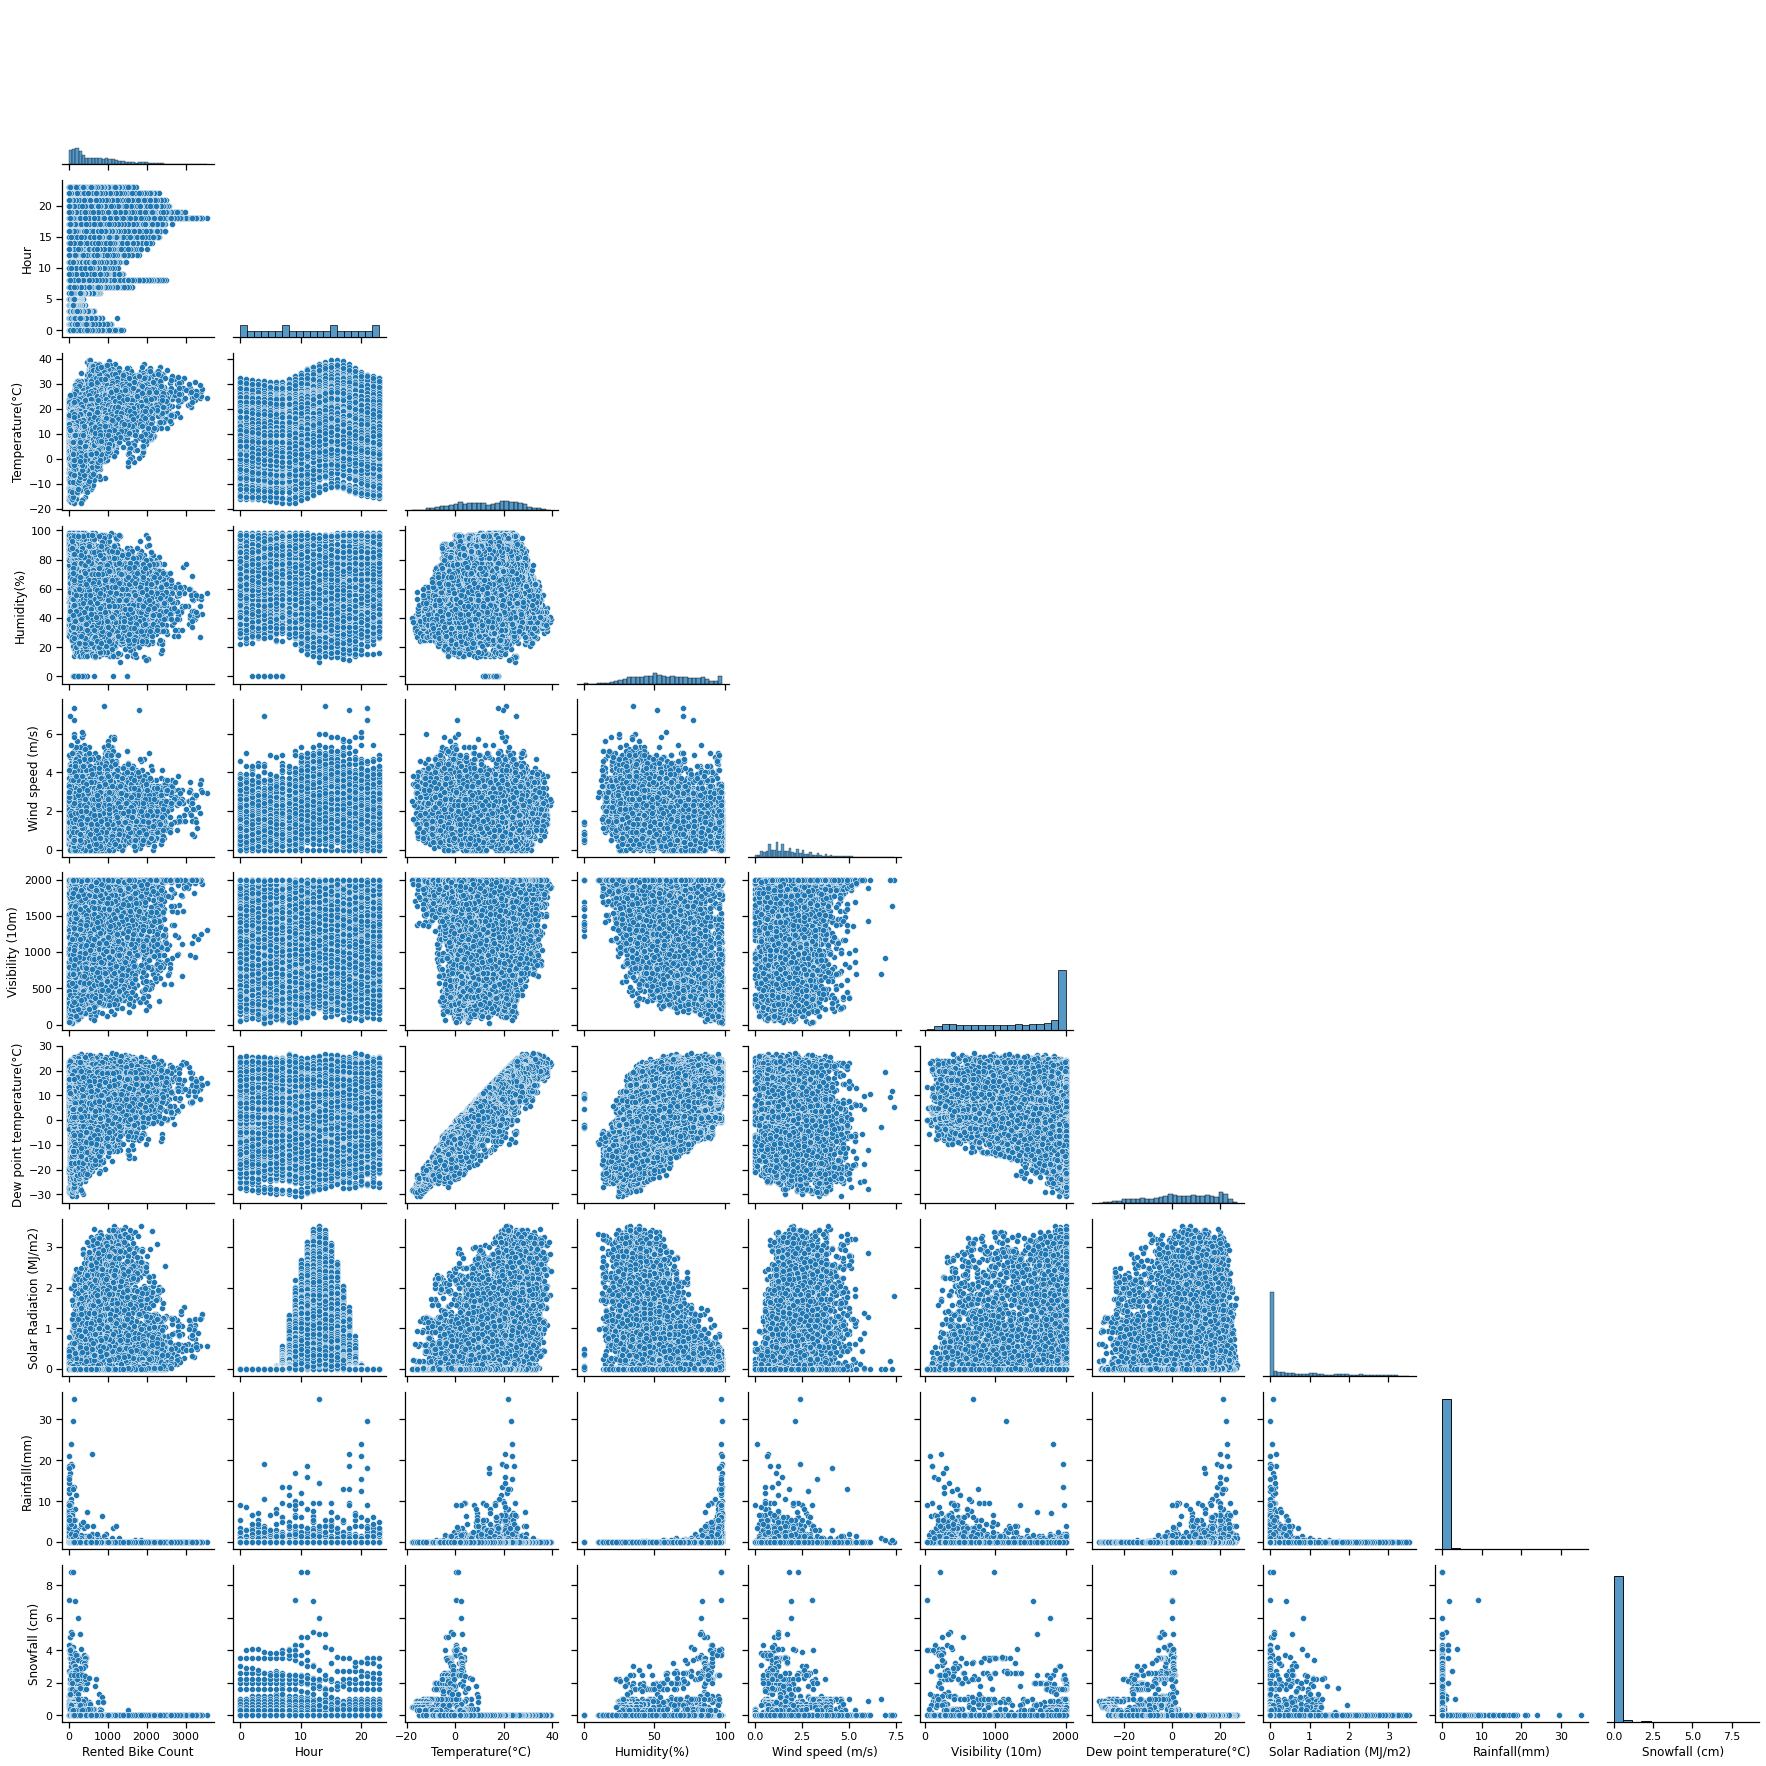

In [ ]:
# adjusting labelsize for seaborn and pairplot
sns.set_context("notebook", rc={"axes.labelsize":12})
sns.pairplot(df, corner = True)

We note that the distribution between Temperature and Dew Point Temperature is linearly distributed. Other plots are fairly scattered.

# Feature Engineering

Feature engineering is the process of selecting, manipulating, and transforming raw data into features that can be used in supervised learning. Feature engineering in machine learning aims to improve the performance of models.

## Checking Multicollinearity

Multicollinearity occurs when independent variables in a regression model are correlated. Moderate multicollinearity may not be problematic. However, severe multicollinearity is a problem because it can increase the variance of the coefficient estimates and make the estimates very sensitive to minor changes in the model. Multicollinearity reduces the precision of the estimated coefficients, which weakens the statistical power of your regression model. It mainly affects the multiple linear regression models and tree based models are mostly immune to it.

<Axes: >

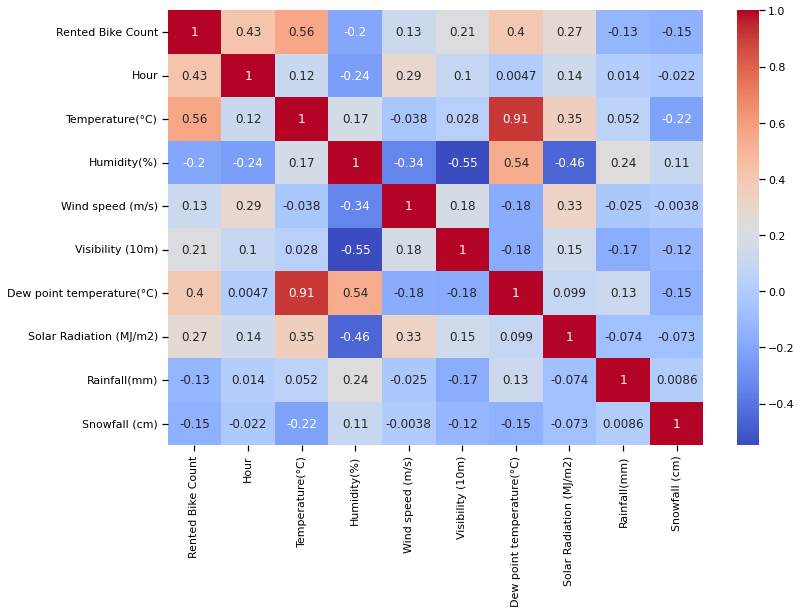

In [ ]:
# checking correlation using heatmap
plt.figure(figsize = (12,8))
sns.heatmap(df.corr(), cmap = 'coolwarm', annot = True)

The heatmap shows that Temperature and Dew point temperature are the most linearly correlated features with correlation coefficient of 0.91. This was also inferred from the pairplot in EDA section.

### Variation Inflation Factor

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in regression analysis. It can estimate how much the variance of a regression coefficient is inflated due to multicollinearity. A large VIF on an independent variable indicates a highly collinear relationship to the other variables.

In [ ]:
# creating a function to calculate VIF for all numeric variables in the dataset
# we import variation_inflation_factor() function from Statsmodels module
def calc_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i ) for i in range(len(X.columns))]
  return vif

In [ ]:
# finding vif for numeric features
calc_vif(df[[i for i in df.describe().columns]])

variables        VIF
0          Rented Bike Count   4.674615
1                       Hour   5.159976
2            Temperature(°C)  36.306687
3                Humidity(%)   5.475162
4           Wind speed (m/s)   4.816527
5           Visibility (10m)   9.100510
6  Dew point temperature(°C)  17.447780
7    Solar Radiation (MJ/m2)   2.897848
8               Rainfall(mm)   1.110871
9              Snowfall (cm)   1.123164

As expected, the most correlated features (Temperature and Dew Point Temperature) in the dataset have very high VIF. The acceptable limit for VIF is around 10. Now we check the VIF for dataset by not including the Dew Point Temperature feature.

In [ ]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Dew point temperature(°C)']]])

variables       VIF
0        Rented Bike Count  4.617043
1                     Hour  4.815356
2          Temperature(°C)  4.589017
3              Humidity(%)  5.048064
4         Wind speed (m/s)  4.625286
5         Visibility (10m)  4.880668
6  Solar Radiation (MJ/m2)  2.243573
7             Rainfall(mm)  1.110039
8            Snowfall (cm)  1.122836

Now the VIF for all numeric features is in acceptable limits. So we'll drop the Dew Point Temperature feature.

## Removing Redundant Columns

In [ ]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'Month', 'Day of Week'],
      dtype='object')

Along with dew point temperature, we also remove the date column as we have extracted the month and day already. We also remove Functioning day feature as it now contains only one unique value.

In [ ]:
df.drop(columns = ['Dew point temperature(°C)','Date','Functioning Day'], inplace = True)

In [ ]:
df[25:35]

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
25                308     1             -2.2           86               0.6   
26                262     2             -2.9           86               1.5   
27                167     3             -3.5           81               2.2   
28                 89     4             -3.8           79               2.0   
29                 79     5             -4.0           79               1.5   
30                 70     6             -4.3           82               2.1   
31                146     7             -4.4           81               2.5   
32                219     8             -4.2           79               2.1   
33                328     9             -2.9           68               1.6   
34                334    10             -0.4           57               1.6   

    Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
25               990                     0.00           0.0            0.0   
26              1256                     0.00           0.0            0.0   
27              1221                     0.00           0.0            0.0   
28              1167                     0.00           0.0            0.0   
29              1202                     0.00           0.0            0.0   
30              1178                     0.00           0.0            0.0   
31              1276                     0.00           0.0            0.0   
32              1436                     0.01           0.0            0.0   
33              1487                     0.30           0.0            0.0   
34              1309                     0.80           0.0            0.0   

   Seasons     Holiday     Month Day of Week  
25  Winter  No Holiday  December    Saturday  
26  Winter  No Holiday  December    Saturday  
27  Winter  No Holiday  December    Saturday  
28  Winter  No Holiday  December    Saturday  
29  Winter  No Holiday  December    Saturday  
30  Winter  No Holiday  December    Saturday  
31  Winter  No Holiday  December    Saturday  
32  Winter  No Holiday  December    Saturday  
33  Winter  No Holiday  December    Saturday  
34  Winter  No Holiday  December    Saturday

## Converting "Holiday" categorical variable to Binary variable

The "Holiday" column has 2 values - Holiday and No Holiday. So we convert the contents into 1 for Holiday and 0 for No Holiday.

In [ ]:
df['Holiday'] = (df['Holiday'] == 'Holiday')*1
df[500:515]

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
500                288    20              0.2           72               0.7   
501                248    21             -0.4           74               0.6   
502                252    22             -1.1           78               0.6   
503                212    23             -1.5           79               0.6   
504                196     0             -1.7           79               0.5   
505                250     1             -1.6           79               0.6   
506                161     2             -1.1           79               0.7   
507                 99     3             -0.6           76               0.5   
508                 64     4             -0.3           76               0.9   
509                 76     5             -0.2           73               0.8   
510                114     6             -0.1           71               0.8   
511                283     7             -0.3           72               0.7   
512                544     8             -0.4           69               0.5   
513                298     9              0.3           67               0.7   
514                248    10              1.4           64               1.0   

     Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
500               990                     0.00           0.0            0.8   
501              1065                     0.00           0.0            0.8   
502               865                     0.00           0.0            0.8   
503               821                     0.00           0.0            0.8   
504               794                     0.00           0.0            0.8   
505               784                     0.00           0.0            0.8   
506               736                     0.00           0.0            0.8   
507               789                     0.00           0.0            0.7   
508               760                     0.00           0.0            0.7   
509               880                     0.00           0.0            0.7   
510               895                     0.00           0.0            0.7   
511               919                     0.00           0.0            0.7   
512               904                     0.00           0.0            0.7   
513               897                     0.03           0.0            0.6   
514               897                     0.25           0.0            0.5   

    Seasons  Holiday     Month Day of Week  
500  Winter        0  December    Thursday  
501  Winter        0  December    Thursday  
502  Winter        0  December    Thursday  
503  Winter        0  December    Thursday  
504  Winter        1  December      Friday  
505  Winter        1  December      Friday  
506  Winter        1  December      Friday  
507  Winter        1  December      Friday  
508  Winter        1  December      Friday  
509  Winter        1  December      Friday  
510  Winter        1  December      Friday  
511  Winter        1  December      Friday  
512  Winter        1  December      Friday  
513  Winter        1  December      Friday  
514  Winter        1  December      Friday

In [ ]:
df['Holiday'].unique()

array([0, 1])

## Creating Dummy variables

Variables that do not have any natural scale of measurement, usually indicate the presence or absence of a “quality” or an attribute like yes or no, so they are defined on a nominal scale. Such variables can be quantified by artificially constructing the variables that take the values, e.g., 1 and 0 where “1” indicates usually the presence of an attribute and “0” usually indicates the absence of an attribute.

A dummy variable is a variable that takes values of 0 and 1, where the values indicate the presence or absence of something (e.g., a 0 may indicate a placebo and 1 may indicate a drug). Where a categorical variable has more than two categories, it can be represented by a set of dummy variables, with one variable for each category. So we create dummy variables for the features Seasons, Month, Day of Week and also Hour as it is not ordinal variable but nominal variable.

In [ ]:
# pandas function to get dataframe with categorical variables converted to dummy variables
df = pd.get_dummies(df)
df

Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                   254     0             -5.2           37               2.2   
1                   204     1             -5.5           38               0.8   
2                   173     2             -6.0           39               1.0   
3                   107     3             -6.2           40               0.9   
4                    78     4             -6.0           36               2.3   
...                 ...   ...              ...          ...               ...   
8755               1003    19              4.2           34               2.6   
8756                764    20              3.4           37               2.3   
8757                694    21              2.6           39               0.3   
8758                712    22              2.1           41               1.0   
8759                584    23              1.9           43               1.3   

      Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0                 2000                      0.0           0.0            0.0   
1                 2000                      0.0           0.0            0.0   
2                 2000                      0.0           0.0            0.0   
3                 2000                      0.0           0.0            0.0   
4                 2000                      0.0           0.0            0.0   
...                ...                      ...           ...            ...   
8755              1894                      0.0           0.0            0.0   
8756              2000                      0.0           0.0            0.0   
8757              1968                      0.0           0.0            0.0   
8758              1859                      0.0           0.0            0.0   
8759              1909                      0.0           0.0            0.0   

      Holiday  ...  Month_November  Month_October  Month_September  \
0           0  ...               0              0                0   
1           0  ...               0              0                0   
2           0  ...               0              0                0   
3           0  ...               0              0                0   
4           0  ...               0              0                0   
...       ...  ...             ...            ...              ...   
8755        0  ...               1              0                0   
8756        0  ...               1              0                0   
8757        0  ...               1              0                0   
8758        0  ...               1              0                0   
8759        0  ...               1              0                0   

      Day of Week_Friday  Day of Week_Monday  Day of Week_Saturday  \
0                      1                   0                     0   
1                      1                   0                     0   
2                      1                   0                     0   
3                      1                   0                     0   
4                      1                   0                     0   
...                  ...                 ...                   ...   
8755                   1                   0                     0   
8756                   1                   0                     0   
8757                   1                   0                     0   
8758                   1                   0                     0   
8759                   1                   0                     0   

      Day of Week_Sunday  Day of Week_Thursday  Day of Week_Tuesday  \
0                      0                     0                    0   
1                      0                     0                    0   
2                      0                     0                    0   
3                      0                     0                    0   
4                      0           

In [ ]:
df = pd.get_dummies(df, columns = ['Hour'])
pd.options.display.max_columns = 135
df.head()

Rented Bike Count  Temperature(°C)  Humidity(%)  Wind speed (m/s)  \
0                254             -5.2           37               2.2   
1                204             -5.5           38               0.8   
2                173             -6.0           39               1.0   
3                107             -6.2           40               0.9   
4                 78             -6.0           36               2.3   

   Visibility (10m)  Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  \
0              2000                      0.0           0.0            0.0   
1              2000                      0.0           0.0            0.0   
2              2000                      0.0           0.0            0.0   
3              2000                      0.0           0.0            0.0   
4              2000                      0.0           0.0            0.0   

   Holiday  Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
0        0               0               0               0               1   
1        0               0               0               0               1   
2        0               0               0               0               1   
3        0               0               0               0               1   
4        0               0               0               0               1   

   Month_April  Month_August  Month_December  Month_February  Month_January  \
0            0             0               1               0              0   
1            0             0               1               0              0   
2            0             0               1               0              0   
3            0             0               1               0              0   
4            0             0               1               0              0   

   Month_July  Month_June  Month_March  Month_May  Month_November  \
0           0           0            0          0               0   
1           0           0            0          0               0   
2           0           0            0          0               0   
3           0           0            0          0               0   
4           0           0            0          0               0   

   Month_October  Month_September  Day of Week_Friday  Day of Week_Monday  \
0              0                0                   1                   0   
1              0                0                   1                   0   
2              0                0                   1                   0   
3              0                0                   1                   0   
4              0                0                   1                   0   

   Day of Week_Saturday  Day of Week_Sunday  Day of Week_Thursday  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   
3                     0                   0                     0   
4                     0                   0                     0   

   Day of Week_Tuesday  Day of Week_Wednesday  Hour_0  Hour_1  Hour_2  Hour_3  \
0                    0                      0       1       0       0       0   
1                    0                      0       0       1       0       0   
2                    0                      0       0       0       1       0   
3                    0                      0       0       0       0       1   
4                    0                      0       0       0       0       0   

   Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  Hour_9  Hour_10  Hour_11  Hour_12  \
0       0       0       0       0       0       0        0        0        0   
1       0       0       0       0       0       0        0        0        0   
2       0       0       0       0       0       0        0        0        0   
3       0       0       0       0       0       0        0     

In [ ]:
# making sure we have all numeric datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8465 entries, 0 to 8759
Data columns (total 56 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8465 non-null   int64  
 1   Temperature(°C)          8465 non-null   float64
 2   Humidity(%)              8465 non-null   int64  
 3   Wind speed (m/s)         8465 non-null   float64
 4   Visibility (10m)         8465 non-null   int64  
 5   Solar Radiation (MJ/m2)  8465 non-null   float64
 6   Rainfall(mm)             8465 non-null   float64
 7   Snowfall (cm)            8465 non-null   float64
 8   Holiday                  8465 non-null   int64  
 9   Seasons_Autumn           8465 non-null   uint8  
 10  Seasons_Spring           8465 non-null   uint8  
 11  Seasons_Summer           8465 non-null   uint8  
 12  Seasons_Winter           8465 non-null   uint8  
 13  Month_April              8465 non-null   uint8  
 14  Month_August            

# Machine Learning Model Implementation

For every regression technique that we use here, we first create the model, then we train the model to fit to the training dataset. Then we make the predictions on the test data which is the unseen data for the model. Finally to measure the performance of the model, we calculate various performance metrics using the predicted values and actual test values for the model. However, before proceeding for model implementation, we have few prerequisites for the dataset.

First we separate the independent features and dependent feature.

In [ ]:
df.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Holiday', 'Seasons_Autumn',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Month_April',
       'Month_August', 'Month_December', 'Month_February', 'Month_January',
       'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Day of Week_Friday', 'Day of Week_Monday', 'Day of Week_Saturday',
       'Day of Week_Sunday', 'Day of Week_Thursday', 'Day of Week_Tuesday',
       'Day of Week_Wednesday', 'Hour_0', 'Hour_1', 'Hour_2', 'Hour_3',
       'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10',
       'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16',
       'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22',
       'Hour_23'],
      dtype='object')

In [ ]:
# output of model is the Rented bike count
# creating list of feature names first
dependent_var = 'Rented Bike Count'
independent_var = list(df.columns)
independent_var.remove(dependent_var)

In [ ]:
independent_var

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Holiday',
 'Seasons_Autumn',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Month_April',
 'Month_August',
 'Month_December',
 'Month_February',
 'Month_January',
 'Month_July',
 'Month_June',
 'Month_March',
 'Month_May',
 'Month_November',
 'Month_October',
 'Month_September',
 'Day of Week_Friday',
 'Day of Week_Monday',
 'Day of Week_Saturday',
 'Day of Week_Sunday',
 'Day of Week_Thursday',
 'Day of Week_Tuesday',
 'Day of Week_Wednesday',
 'Hour_0',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23']

In [ ]:
X = df[independent_var]
X.tail()

Temperature(°C)  Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
8755              4.2           34               2.6              1894   
8756              3.4           37               2.3              2000   
8757              2.6           39               0.3              1968   
8758              2.1           41               1.0              1859   
8759              1.9           43               1.3              1909   

      Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  Holiday  \
8755                      0.0           0.0            0.0        0   
8756                      0.0           0.0            0.0        0   
8757                      0.0           0.0            0.0        0   
8758                      0.0           0.0            0.0        0   
8759                      0.0           0.0            0.0        0   

      Seasons_Autumn  Seasons_Spring  Seasons_Summer  Seasons_Winter  \
8755               1               0               0               0   
8756               1               0               0               0   
8757               1               0               0               0   
8758               1               0               0               0   
8759               1               0               0               0   

      Month_April  Month_August  Month_December  Month_February  \
8755            0             0               0               0   
8756            0             0               0               0   
8757            0             0               0               0   
8758            0             0               0               0   
8759            0             0               0               0   

      Month_January  Month_July  Month_June  Month_March  Month_May  \
8755              0           0           0            0          0   
8756              0           0           0            0          0   
8757              0           0           0            0          0   
8758              0           0           0            0          0   
8759              0           0           0            0          0   

      Month_November  Month_October  Month_September  Day of Week_Friday  \
8755               1              0                0                   1   
8756               1              0                0                   1   
8757               1              0                0                   1   
8758               1              0                0                   1   
8759               1              0                0                   1   

      Day of Week_Monday  Day of Week_Saturday  Day of Week_Sunday  \
8755                   0                     0                   0   
8756                   0                     0                   0   
8757                   0                     0                   0   
8758                   0                     0                   0   
8759                   0                     0                   0   

      Day of Week_Thursday  Day of Week_Tuesday  Day of Week_Wednesday  \
8755                     0                    0                      0   
8756                     0                    0                      0   
8757                     0                    0                      0   
8758                     0                    0                      0   
8759                     0                    0                      0   

      Hour_0  Hour_1  Hour_2  Hour_3  Hour_4  Hour_5  Hour_6  Hour_7  Hour_8  \
8755       0       0       0       0       0       0       0       0       0   
8756       0       0       0       0       0       0       0       0       0   
8757       0       0       0       0       0       0       0       0       0   
8758       0       0       0       0       0       0       0       0       0   
8759       0       0       0       0       0       0       0       0       0   

      Hour_9  Hour_10  Hour_11  Hour_12  Hour_13  Hour_14  Hour_15 

In [ ]:
y = df[[dependent_var]]
y.tail()

Rented Bike Count
8755               1003
8756                764
8757                694
8758                712
8759                584

### Splitting data into training set and testing set

The train-test split is a technique for evaluating the performance of a machine learning algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is used to fit the model and is referred to as the training dataset. The second subset is not used to train the model; instead, the input element of the dataset is provided to the model, then predictions are made and compared to the expected values. This second dataset is referred to as the test dataset. The objective is to estimate the performance of the machine learning model on new data i.e. data not used to train the model.

In [ ]:
# splitting in ratio train:test = 80:20
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.75, random_state = 0)

In [ ]:
X_train.shape, y_train.shape

((6348, 55), (6348, 1))

In [ ]:
X_test.shape, y_test.shape

((2117, 55), (2117, 1))

Previously we had 8465 rows. Now training set has 0.75*8465 = 6348 rows and remaining 2117 rows in testing data.

## Linear Regression

At first, we implement linear regression. Since linear regression uses gradient descent algorithm, we need to scale our data as part of preprocessing before training our model.

In [ ]:
# using minmaxscaler to scale the data
scaler = MinMaxScaler()
# using scaler object to fit to training data and then transform the train and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

The training data is now scaled between 0 and 1 according to the minimum and maximum value in the data.

In [ ]:
X_train_scaled

array([[0.51142355, 0.82653061, 0.16216216, ..., 0.        , 1.        ,
        0.        ],
       [0.53427065, 0.57142857, 0.33783784, ..., 0.        , 0.        ,
        0.        ],
       [0.66783831, 0.68367347, 0.16216216, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.79086116, 0.31632653, 0.25675676, ..., 0.        , 0.        ,
        0.        ],
       [0.47627417, 0.31632653, 0.10810811, ..., 0.        , 0.        ,
        0.        ],
       [0.43233743, 0.84693878, 0.44594595, ..., 0.        , 0.        ,
        0.        ]])

Now we create the linear regression model.

In [ ]:
# creating linear regression model
linear_reg = LinearRegression()
# fitting the model to training data
linear_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# intercept value of linear model
linear_reg.intercept_

array([-6.20943279e+14])

In [ ]:
# coefficients of the linear model for different independent variables
linear_reg.coef_

array([[ 1.45709863e+03, -6.10344920e+02,  6.17316032e+00,
         8.35790431e+01,  1.67511827e+02, -2.16884090e+03,
         2.10857978e+02, -1.16586948e+02,  5.99100099e+14,
         7.46294816e+14,  1.23084329e+15,  4.20982742e+14,
         3.39595147e+13, -4.50588964e+14,  3.59271588e+14,
         3.59271588e+14,  3.59271588e+14, -4.50588964e+14,
        -4.50588964e+14,  3.39595147e+13,  3.39595147e+13,
         1.81154232e+14,  1.81154232e+14,  1.81154232e+14,
        -1.85242887e+14, -1.85242887e+14, -1.85242887e+14,
        -1.85242887e+14, -1.85242887e+14, -1.85242887e+14,
        -1.85242887e+14,  2.59318350e+13,  2.59318350e+13,
         2.59318350e+13,  2.59318350e+13,  2.59318350e+13,
         2.59318350e+13,  2.59318350e+13,  2.59318350e+13,
         2.59318350e+13,  2.59318350e+13,  2.59318350e+13,
         2.59318350e+13,  2.59318350e+13,  2.59318350e+13,
         2.59318350e+13,  2.59318350e+13,  2.59318350e+13,
         2.59318350e+13,  2.59318350e+13,  2.59318350e+1

Now that the linear model is trained, we now make predictions on the testing data.

In [ ]:
# predicting on testing data
y_pred_linear = linear_reg.predict(X_test_scaled)
# comparing the predicted and actual test values
y_pred_linear[:10], y_test[:10]

(array([[ -17.25 ],
        [ 703.   ],
        [ 444.75 ],
        [-493.375],
        [ 671.75 ],
        [ 856.75 ],
        [ 826.25 ],
        [ 257.   ],
        [1148.   ],
        [ 383.625]]),       Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427)

In [ ]:
# making predictions on train data just to see how close the values are to the actual
y_pred_train = linear_reg.predict(X_train_scaled)
y_pred_train[:10],y_train['Rented Bike Count'][:10]

(array([[ 892.375],
        [1238.125],
        [ 614.5  ],
        [ 405.25 ],
        [ 650.5  ],
        [ 957.125],
        [ 402.5  ],
        [ 906.5  ],
        [ 130.75 ],
        [1022.125]]), 8158    1215
 8131    1180
 6725     247
 6558     436
 1700     308
 7859     940
 1001     219
 5785     575
 371      239
 5129     861
 Name: Rented Bike Count, dtype: int64)

To measure the performance of regression model, we will use different performance metrics to know how good the model performs on test data. The metrics that we use are 'Mean Squared Error (MSE)','Root Mean Squared Error (RMSE)','Mean Absolute Error (MAE)','R-squared score ' and 'Adjusted R-squared'.

In [ ]:
# creating a dataframe to store the different metric values for different algorithms
metric_df = pd.DataFrame(columns = ['Mean Squared Error','Root Mean Squared Error','Mean Absolute Error','R-squared score','Adjusted R-squared'],
                         index = ['Linear Regression','Lasso Regularized Linear Regression','Ridge Regularized Linear Regression',
                                  'Elastic Net Regularized Linear Regression','Decision Tree','Tuned Decision Tree','Random Forest','Tuned Random Forest',
                                  'Gradient Boosting','XGBoost'])

In [ ]:
# calculating the metrics for linear regression
metric_df.iloc[0] = [mean_squared_error(y_test,y_pred_linear),np.sqrt(mean_squared_error(y_test,y_pred_linear)),mean_absolute_error(y_test,y_pred_linear),
                  r2_score(y_test, y_pred_linear),1-(1-r2_score((y_test), (y_pred_linear)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
# performance of linear regression
metric_df.iloc[0]

Mean Squared Error         128607.837705
Root Mean Squared Error       358.619349
Mean Absolute Error           270.226677
R-squared score                 0.681255
Adjusted R-squared              0.672749
Name: Linear Regression, dtype: object

In [ ]:
# metric for predictions on train data
print('Training Accuracy of Linear Regression')
{'MSE':mean_squared_error(y_train,y_pred_train),'RMSE':np.sqrt(mean_squared_error(y_train,y_pred_train)),'MAE':mean_absolute_error(y_train,y_pred_train),
                  'R-squared':r2_score(y_train, y_pred_train),'Adjusted R-squared':1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))}

Training Accuracy of Linear Regression


{'MSE': 121072.0895606884,
 'RMSE': 347.95414864704287,
 'MAE': 264.4175724637681,
 'R-squared': 0.7086726303800859,
 'Adjusted R-squared': 0.7061260624638279}

**INFERENCE:** The linear regression model does a descent job in predicting values as it has Adjusted R-square value of 0.6727 meaning the linear regression model explains 67.27% of the variation in the data. Adjusted R-squared is 70.61% for predictions on training set meaning it has not overfit.

### Linear Regression with Lasso regularization

To avoid overfitting in linear regression, we have regularization techniques. Even though our linear regression model has not overfit to train data, we conduct the regularization technique to note its effect. Here we implement Lasso regularization. We use grid search cross validation to find the best alpha value for Lasso regularization.

In [ ]:
# creating Lasso model
lasso = Lasso()
# creating a range of alpha values for GridSearchCV
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
# applying 5 fold cross validation on various alpha values and choosing the best one
lasso_reg = GridSearchCV(lasso, parameters, scoring = 'neg_mean_squared_error', cv = 5)
# fitting the lasso model on training set
lasso_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_reg.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.1}


In [ ]:
# making predictions on test dataset
y_pred_lasso = lasso_reg.predict(X_test_scaled)

In [ ]:
# comparing the predicted and actual test values
y_test[:10],y_pred_lasso[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427,
 array([ -15.80594228,  707.85247822,  445.10672984, -489.9417414 ,
         669.68571746,  857.93134865,  822.73356325,  249.82733938,
        1146.83166677,  385.28417962]))

In [ ]:
# performance of linear regression with lasso regularization
metric_df.iloc[1] = [mean_squared_error(y_test,y_pred_lasso),np.sqrt(mean_squared_error(y_test,y_pred_lasso)),mean_absolute_error(y_test,y_pred_lasso),
                  r2_score(y_test, y_pred_lasso),1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[1]

Mean Squared Error         128689.22519
Root Mean Squared Error      358.732805
Mean Absolute Error          270.204712
R-squared score                0.681054
Adjusted R-squared             0.672542
Name: Lasso Regularized Linear Regression, dtype: object

**INFERENCE:** Lasso regularization is having no effect and performs almost similar to linear regression without regularization. It explains 67.25% variation in data which is slightly less than linear regression (67.27%). Also RMSE and MAE have also increased slightly but negligible.

### Linear Regression with Ridge regularization

Now we implement Ridge regularization by selecting the alpha by grid search cross validation.

In [ ]:
# creating Ridge model
ridge = Ridge()
# creating a range of alpha values for GridSearchCV
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.1,1,5,10,20,30,40,45,50,55,60,100]}
# applying 5 fold cross validation on various alpha values and choosing the best one
ridge_reg = GridSearchCV(ridge, parameters, scoring = 'neg_mean_squared_error', cv = 5)
# fitting the ridge model on training set
ridge_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.1, 1, 5, 10, 20, 30, 40, 45, 50, 55,
                                   60, 100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_reg.best_params_)

The best fit alpha value is found out to be : {'alpha': 1}


In [ ]:
# making predictions on test dataset
y_pred_ridge = ridge_reg.predict(X_test_scaled)

In [ ]:
# comparing the predicted and actual test values
y_test[:10],y_pred_ridge[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427, array([[ -12.17933741],
        [ 704.11230654],
        [ 439.08201955],
        [-488.07456781],
        [ 668.01072764],
        [ 858.35816388],
        [ 820.78303088],
        [ 252.35578103],
        [1150.26371129],
        [ 383.88122338]]))

In [ ]:
# performance of linear regression with ridge regularization
metric_df.iloc[2] = [mean_squared_error(y_test,y_pred_ridge),np.sqrt(mean_squared_error(y_test,y_pred_ridge)),mean_absolute_error(y_test,y_pred_ridge),
                  r2_score(y_test, y_pred_ridge),1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[2]

Mean Squared Error         128975.971076
Root Mean Squared Error       359.132247
Mean Absolute Error           270.542769
R-squared score                 0.680343
Adjusted R-squared              0.671813
Name: Ridge Regularized Linear Regression, dtype: object

**INFERENCE:** Ridge regression also performs at par with Linear regression and Lasso regression with Adjusted R-squared value 67.18% which is again slighlty less than Lasso. Also RMSE and MAE have incresed slightly.

### Linear Regression with Elastic net regularization

Elastic net linear regression uses the penalties from both the lasso and ridge techniques to regularize regression models. It has another parameter l1-ratio which defines the proportion of combination of ridge and lasso regularization.

In [ ]:
# creating elasticnet model
elastic = ElasticNet()
# creating a range of alpha values for GridSearchCV
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100], 'l1_ratio': [0.3,0.4,0.5,0.6,0.7,0.8]}
# applying 5 fold cross validation on various alpha values and choosing the best one
elastic_reg = GridSearchCV(elastic, parameters, scoring = 'neg_mean_squared_error', cv=5)
# fitting the elasticnet model on training set
elastic_reg.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_reg.best_params_)

The best fit alpha value is found out to be : {'alpha': 0.001, 'l1_ratio': 0.8}


In [ ]:
# making predictions on test dataset
y_pred_elastic = elastic_reg.predict(X_test_scaled)

In [ ]:
# comparing the predicted and actual test values
y_test[:10], y_pred_elastic[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427,
 array([ -11.07650784,  704.60087824,  437.77902426, -486.5215057 ,
         667.26750513,  858.87819565,  819.34648483,  251.09818101,
        1150.84309095,  383.72601438]))

In [ ]:
# performance of linear regression with elasticnet regularization
metric_df.iloc[3] = [mean_squared_error(y_test,y_pred_elastic),np.sqrt(mean_squared_error(y_test,y_pred_elastic)),mean_absolute_error(y_test,y_pred_elastic),
                  r2_score(y_test, y_pred_elastic),1-(1-r2_score((y_test), (y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[3]

Mean Squared Error         129086.36108
Root Mean Squared Error      359.285904
Mean Absolute Error          270.618228
R-squared score                0.680069
Adjusted R-squared             0.671532
Name: Elastic Net Regularized Linear Regression, dtype: object

In [ ]:
metric_df[:4]

Mean Squared Error  \
Linear Regression                              128607.837705   
Lasso Regularized Linear Regression             128689.22519   
Ridge Regularized Linear Regression            128975.971076   
Elastic Net Regularized Linear Regression       129086.36108   

                                          Root Mean Squared Error  \
Linear Regression                                      358.619349   
Lasso Regularized Linear Regression                    358.732805   
Ridge Regularized Linear Regression                    359.132247   
Elastic Net Regularized Linear Regression              359.285904   

                                          Mean Absolute Error R-squared score  \
Linear Regression                                  270.226677        0.681255   
Lasso Regularized Linear Regression                270.204712        0.681054   
Ridge Regularized Linear Regression                270.542769        0.680343   
Elastic Net Regularized Linear Regression          270.618228        0.680069   

                                          Adjusted R-squared  
Linear Regression                                   0.672749  
Lasso Regularized Linear Regression                 0.672542  
Ridge Regularized Linear Regression                 0.671813  
Elastic Net Regularized Linear Regression           0.671532

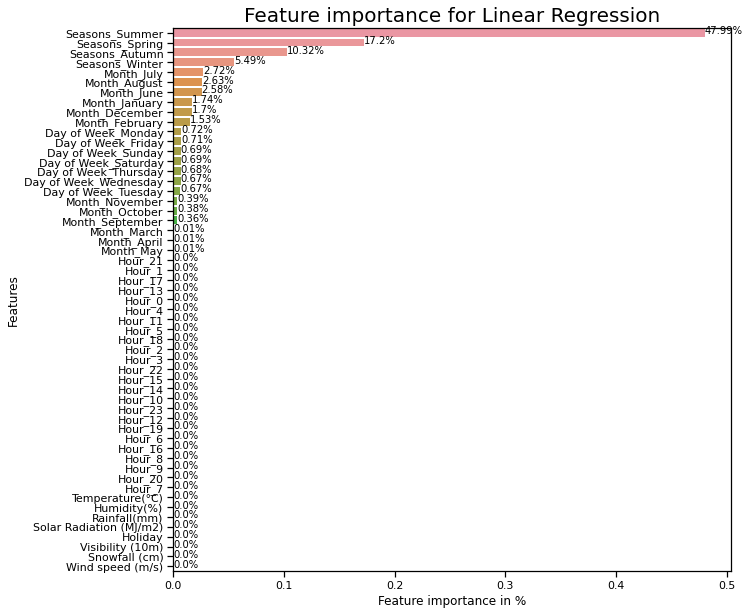

In [ ]:
# calculating feature importance
result = permutation_importance(
      linear_reg, X_train_scaled, y_train, n_repeats=10, random_state=42, n_jobs=2
  )
cf = pd.DataFrame(result.importances_mean, index=X_train.columns).sort_values(by=0, ascending=False)
cf[0] = cf[0]/sum(cf[0])
plt.figure(figsize=(10, 10))
# plotting barplot
ax = sns.barplot(y = cf.index, x = 0, data = cf) 
plt.title('Feature importance for Linear Regression',fontsize = 20)
plt.xlabel('Feature importance in %')
plt.ylabel('Features')
# annotations for bars
for i in ax.patches:
  ax.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()*100), 2))+'%', fontsize=10)

**INFERENCE:** Using Linear Regression model without any regularization technique is better as seen from the metrics and since overfitting is not our concern yet. MSE, RMSE and MAE increased slightly and R-squared and Adjusted R-squared decreased slightly going from Linear regression to Elastic Net regularized linear regression even though the difference was marginal. 

Linear regression has given most of the importance to seasons, then months and day of the week. No importance given to numeric variables like Temperature, Humidity,etc.

However, 67% R-square value is still low so we cannot depend on Linear Regression and we need to look for other algorithms.

## Decision Tree

First we create a simple Decision tree model without specifying any parameter values i.e. we are letting the tree to overfit to training data and we evaluate it.

In [ ]:
# creating decision tree model without any hyperparameter tuning
regressor_dt = DecisionTreeRegressor()
# fitting to train data
regressor_dt.fit(X_train, y_train)

DecisionTreeRegressor()

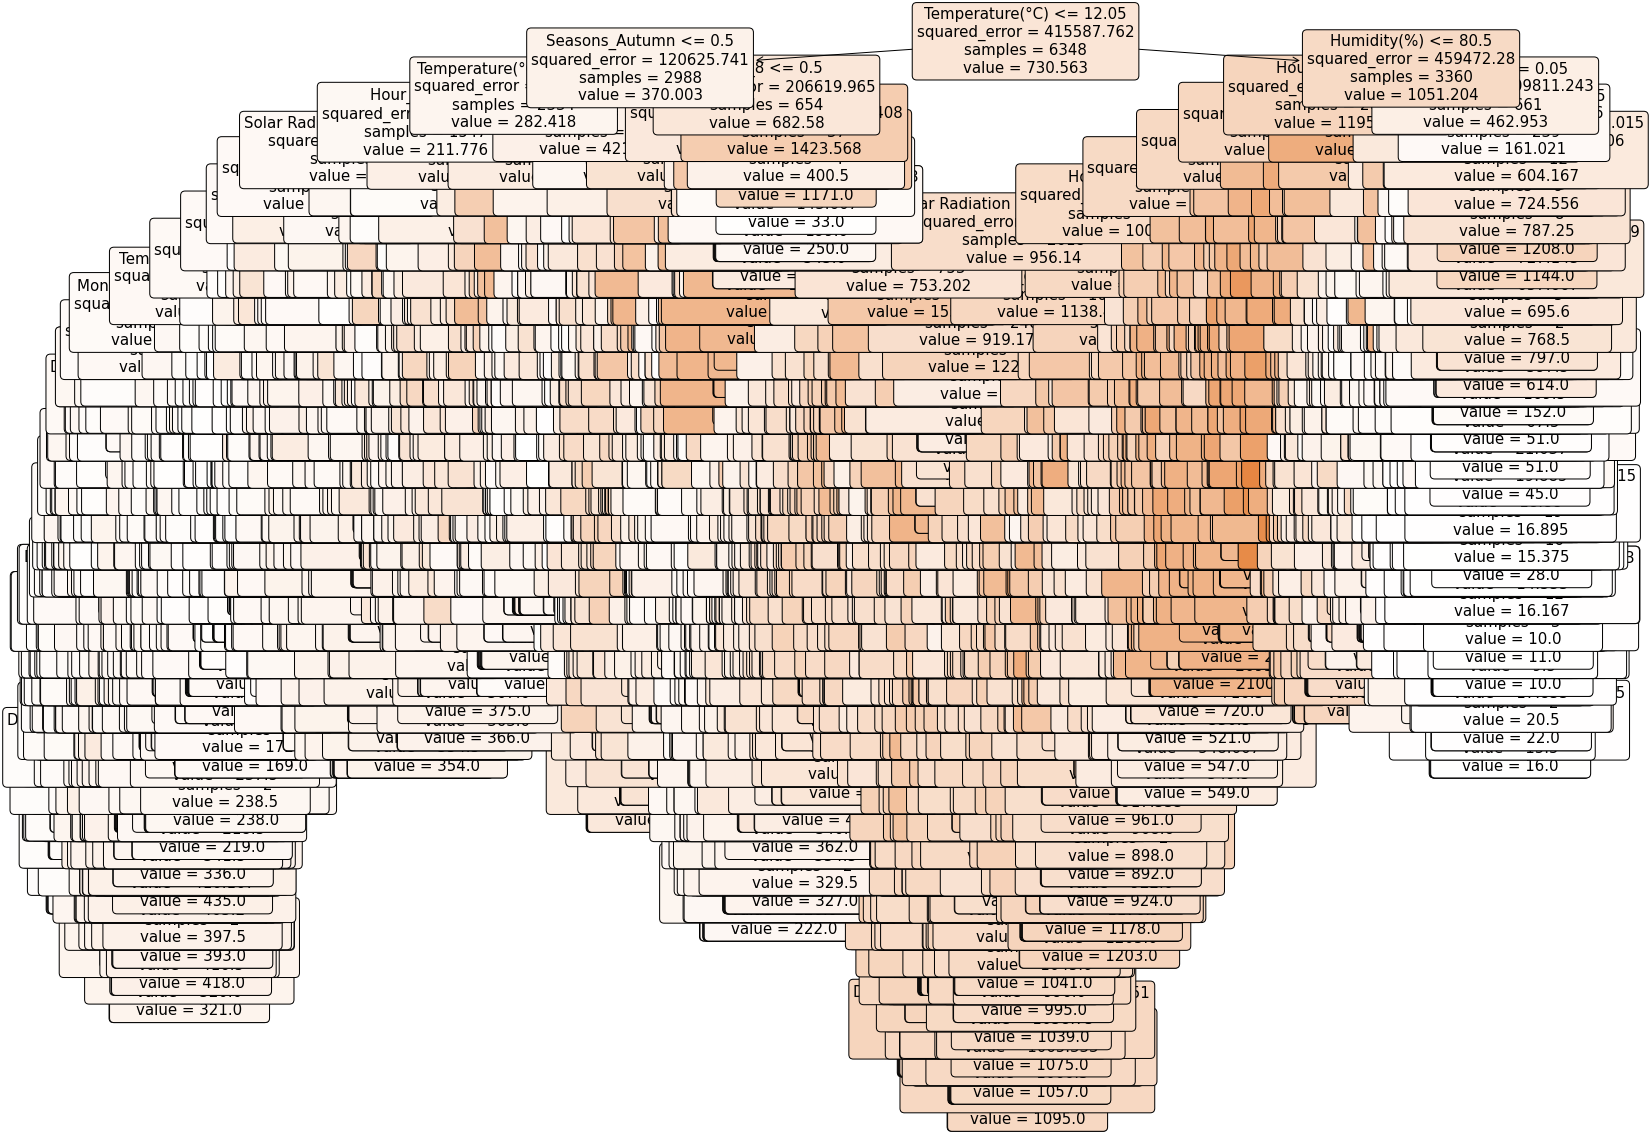

In [ ]:
# Visualizing the tree
plt.figure(figsize=(25,20))
plot_tree(regressor_dt, feature_names = independent_var, filled = True, rounded = True, fontsize = 15)
plt.show()

The tree has overfit and the visualization is very clumsy. Before proceeding with predicting with test data, we see the attributes of this tree.

In [ ]:
# get default tree parameters
regressor_dt.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [ ]:
print('Depth of Tree: ',regressor_dt.get_depth())

Depth of Tree:  39


In [ ]:
print('Number of leaf nodes: ',regressor_dt.get_n_leaves())

Number of leaf nodes:  6255


The tree has overgrown upto 39 depth levels and has 6255 leaf nodes as the default parameters have no limit on depth and leaf nodes, and the tree splits until a node has minimum of 2 samples.

In [ ]:
# metric for predictions on train data
y_pred_train = regressor_dt.predict(X_train)
print('Training Accuracy of Decision Tree')
{'MSE':mean_squared_error(y_train,y_pred_train),'RMSE':np.sqrt(mean_squared_error(y_train,y_pred_train)),'MAE':mean_absolute_error(y_train,y_pred_train),
                  'R-squared':r2_score(y_train, y_pred_train),'Adjusted R-squared':1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))}

Training Accuracy of Decision Tree


{'MSE': 0.0,
 'RMSE': 0.0,
 'MAE': 0.0,
 'R-squared': 1.0,
 'Adjusted R-squared': 1.0}

Now we predict the output for testing data using the tree created.

In [ ]:
# making predictions on test dataset
y_pred_dt = regressor_dt.predict(X_test)

In [ ]:
# comparing the predicted and actual test values
y_test[:10], y_pred_dt[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427,
 array([ 100.,  594.,  582.,   47.,  232., 1056.,  461.,  123., 1462.,
         464.]))

In [ ]:
# performance of decision tree
metric_df.iloc[4] = [mean_squared_error(y_test,y_pred_dt),np.sqrt(mean_squared_error(y_test,y_pred_dt)),mean_absolute_error(y_test,y_pred_dt),
                  r2_score(y_test, y_pred_dt),1-(1-r2_score((y_test), (y_pred_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[4]

Mean Squared Error         81909.798299
Root Mean Squared Error      286.198879
Mean Absolute Error          164.897024
R-squared score                0.796993
Adjusted R-squared             0.791575
Name: Decision Tree, dtype: object

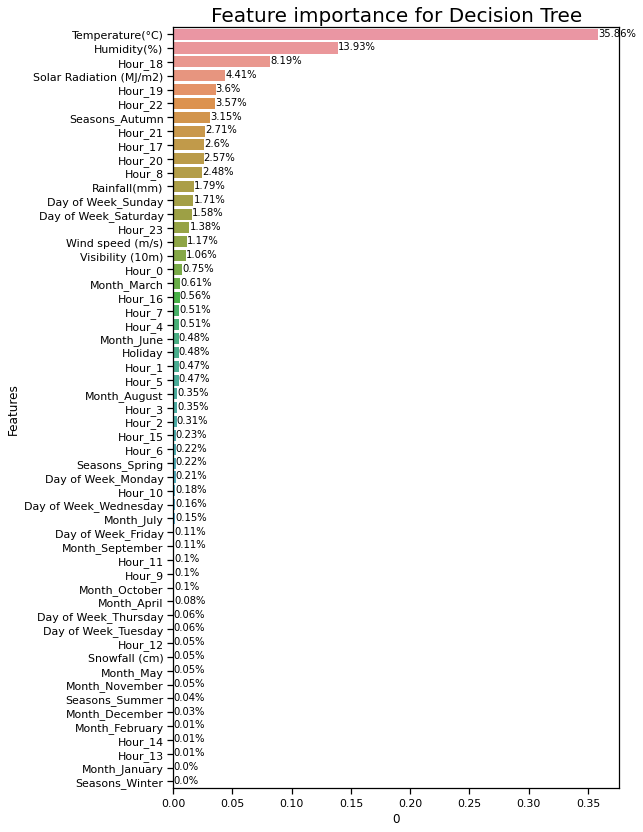

In [ ]:
# calculating feature importance
cf = pd.DataFrame(data = regressor_dt.feature_importances_,columns=[0], index=X_train.columns).sort_values(by=0,ascending = False)
cf[0] = cf[0]/sum(cf[0])
plt.figure(figsize = (8,14))
plt.title('Feature importance for Decision Tree',fontsize = 20)
plt.xlabel('Feature importance in %')
plt.ylabel('Features')
ax = sns.barplot(data = cf, x=cf[0], y= cf.index)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()*100), 2))+'%', fontsize=10)

Now we create another decision tree and we tune the hyperparameters to avoid overfitting and try to improve the predictions.

In [ ]:
# setting the values for hyperparameters out of which the GridSearchCV will run the model for best estimator
parameters={'max_leaf_nodes':[50,100,150,200,250,500,750,1000,1250,1500,2000],'min_samples_split':[5,10,20,30,40,50]}
dt=DecisionTreeRegressor()
# using the above range of parameters for decision tree and negative mean square error as the scoring method and 5 fold cross-validation
regressor_dt2 = GridSearchCV(dt, parameters, scoring='neg_mean_squared_error',cv=5)

In [ ]:
# fitting on training set
regressor_dt2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': [50, 100, 150, 200, 250, 500, 750,
                                            1000, 1250, 1500, 2000],
                         'min_samples_split': [5, 10, 20, 30, 40, 50]},
             scoring='neg_mean_squared_error')

In [ ]:
# estimator with the best performance
regressor_dt2.best_estimator_

DecisionTreeRegressor(max_leaf_nodes=1000, min_samples_split=20)

In [ ]:
print('Depth of Tree: ',regressor_dt2.best_estimator_.get_depth())

Depth of Tree:  31


In [ ]:
print('Number of leaf nodes: ',regressor_dt2.best_estimator_.get_n_leaves())

Number of leaf nodes:  744


The depth of tree chosen as best estimator has reduced from 39 to 31 and the number of leaf nodes has reduced from 6255 to 744.

In [ ]:
# metric for predictions on train data
y_pred_train = regressor_dt2.predict(X_train)
print('Training Accuracy of Tuned Decision Tree')
{'MSE':mean_squared_error(y_train,y_pred_train),'RMSE':np.sqrt(mean_squared_error(y_train,y_pred_train)),'MAE':mean_absolute_error(y_train,y_pred_train),
                  'R-squared':r2_score(y_train, y_pred_train),'Adjusted R-squared':1-(1-r2_score((y_train), (y_pred_train)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))}

Training Accuracy of Tuned Decision Tree


{'MSE': 24080.224911204958,
 'RMSE': 155.1780426194536,
 'MAE': 93.11430670021002,
 'R-squared': 0.9420574253843961,
 'Adjusted R-squared': 0.9415509343475463}

In [ ]:
# making predictions on test dataset
y_pred_dt2 = regressor_dt2.predict(X_test)

In [ ]:
# comparing the predicted and actual test values
y_test[:10],y_pred_dt2[:10]

(      Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427,
 array([  66.86666667,  294.72727273,  726.        ,   43.        ,
         208.83333333,  971.        ,  504.7       ,  144.91666667,
        1417.09090909,  569.        ]))

In [ ]:
# performance of tuned decision tree
metric_df.iloc[5] = [mean_squared_error(y_test,y_pred_dt2),np.sqrt(mean_squared_error(y_test,y_pred_dt2)),mean_absolute_error(y_test,y_pred_dt2),
                  r2_score(y_test, y_pred_dt2),1-(1-r2_score((y_test), (y_pred_dt2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[5]

Mean Squared Error         71873.392073
Root Mean Squared Error      268.092134
Mean Absolute Error           157.14271
R-squared score                0.821867
Adjusted R-squared             0.817114
Name: Tuned Decision Tree, dtype: object

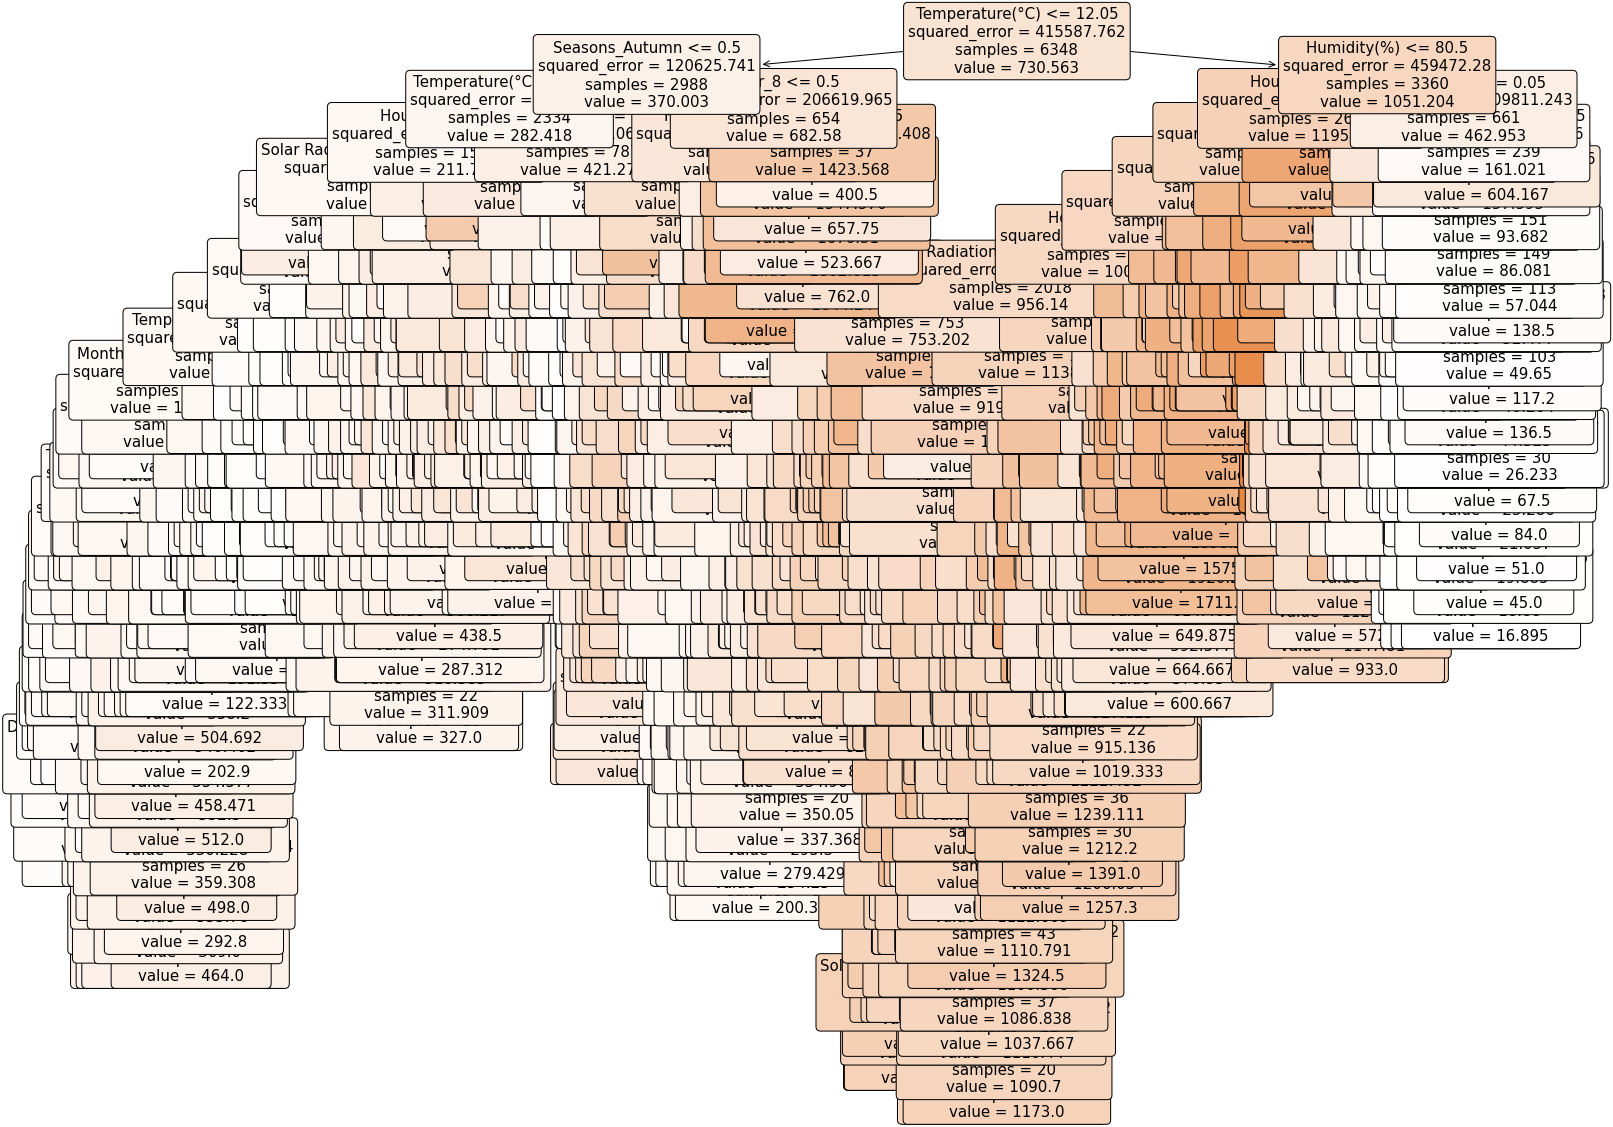

In [ ]:
# visualizing tree
plt.figure(figsize=(25,20))
plot_tree(regressor_dt2.best_estimator_, feature_names = independent_var, filled = True, rounded = True, fontsize = 15)
plt.show()

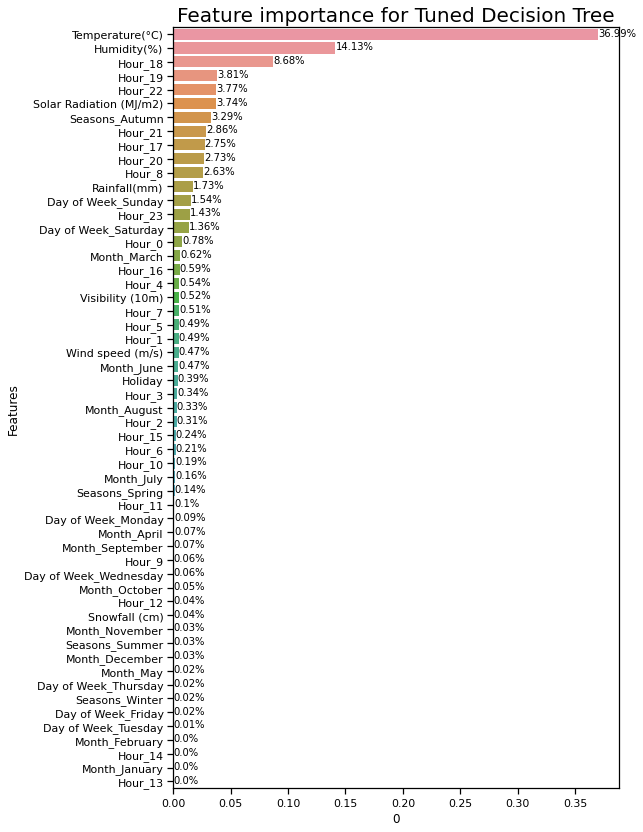

In [ ]:
# calculating feature importance
cf = pd.DataFrame(data = regressor_dt2.best_estimator_.feature_importances_,columns=[0], index=X_train.columns).sort_values(by=0,ascending = False)
cf[0] = cf[0]/sum(cf[0])
plt.figure(figsize = (8,14))
plt.title('Feature importance for Tuned Decision Tree',fontsize = 20)
plt.xlabel('Feature importance in %')
plt.ylabel('Features')
ax = sns.barplot(data = cf, x=cf[0], y= cf.index)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()*100), 2))+'%', fontsize=10)

**INFERENCE:** The decision tree which was let to overfit describes 78.79% of variation in the data with RMSE of 288 and MAE of 165. This overfitted tree has zero error in making training predictions. As we pruned the tree to prevent overfitting by controlling the hyperparameters, where training accuracy decreased, we improved our predictions to some extent as evident from the metrics. The pruned decision tree describes 81.89% of variation in data and the RMSE reduced to 266 and MAE reduced to 156. 

Unlike linear regression, Decision tree has given most importance to Temperature(37%) and Humidity(14%). Then come Hour_18(8%) and Solar Radiation. Tuned decision tree has also similar feature importance plot with decision tree with 4th important feature being Hour_19 and not Solar Radiation.

## Random Forest

Implementing Random Forest model which uses multiple decision trees and see if it performs better than single decision tree.

In [ ]:
# Random Forest model created
regressor_rf = RandomForestRegressor()
# model fit to train data
regressor_rf.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# predicting test data
y_pred_rf = regressor_rf.predict(X_test)

In [ ]:
# performance of random forest
metric_df.iloc[6] = [mean_squared_error(y_test,y_pred_rf),np.sqrt(mean_squared_error(y_test,y_pred_rf)),mean_absolute_error(y_test,y_pred_rf),
                  r2_score(y_test, y_pred_rf),1-(1-r2_score((y_test), (y_pred_rf)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[6]

Mean Squared Error         46479.115914
Root Mean Squared Error      215.590157
Mean Absolute Error          124.634766
R-squared score                0.884805
Adjusted R-squared             0.881731
Name: Random Forest, dtype: object

Random Forest is a combination of multiple trees and it prevents overfitting which is a main drawback of decision trees. Still, we can check if tuning a random forest will improve the predictions or not.

In [ ]:
# setting the values for hyperparameters out of which the GridSearchCV will run the model for best estimator
parameters = {'n_estimators':[50,150,200,250,300,400,500],'min_samples_split': [2,10,50,80]}
rf=RandomForestRegressor()
# using the above range of parameters for random forest and negative mean square error as the scoring method and 5 fold cross-validation
regressor_rf2 = GridSearchCV(rf, parameters, scoring='neg_mean_squared_error',cv=5)

In [ ]:
# fitting on training set
regressor_rf2.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_split': [2, 10, 50, 80],
                         'n_estimators': [50, 150, 200, 250, 300, 400, 500]},
             scoring='neg_mean_squared_error')

In [ ]:
# estimator with the best performance
regressor_rf2.best_estimator_

RandomForestRegressor(n_estimators=500)

In [ ]:
# predicting test data
y_pred_rf2 = regressor_rf2.predict(X_test)

In [ ]:
# comparing predicted and test values
y_pred_rf2[:10],y_pred_rf,y_test[:10]

(array([  80.094,  517.646,  476.762,   50.036,  235.472,  895.198,
         398.082,  151.868, 1512.52 ,  335.766]),
 array([  78.01,  460.14,  480.5 , ..., 1171.09,  705.19,  294.5 ]),
       Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427)

In [ ]:
# performance of random forest with 400 decision trees
metric_df.iloc[7] = [mean_squared_error(y_test,y_pred_rf2),np.sqrt(mean_squared_error(y_test,y_pred_rf2)),mean_absolute_error(y_test,y_pred_rf2),
                  r2_score(y_test, y_pred_rf2),1-(1-r2_score((y_test), (y_pred_rf2)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[7]

Mean Squared Error         45921.547969
Root Mean Squared Error      214.293136
Mean Absolute Error          124.584299
R-squared score                0.886187
Adjusted R-squared              0.88315
Name: Tuned Random Forest, dtype: object

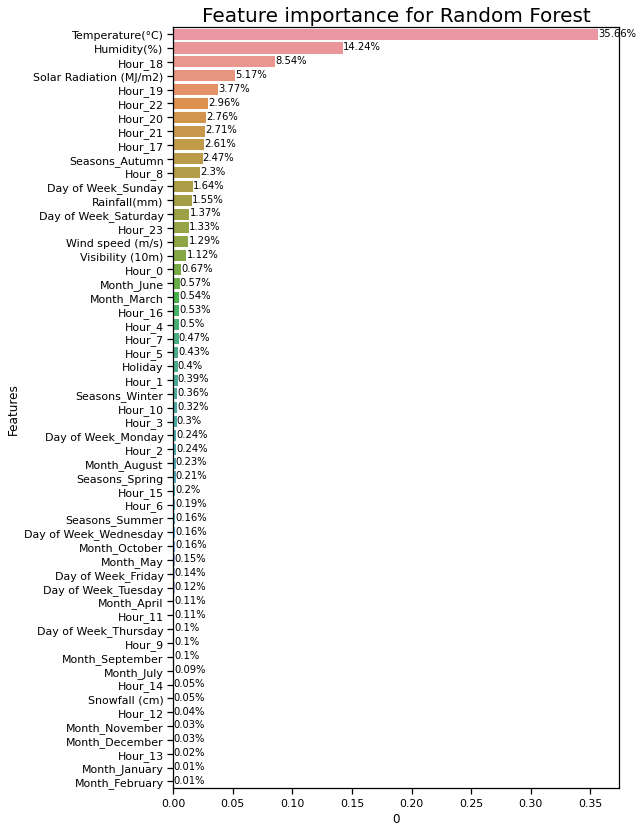

In [ ]:
# calculating feature importance
cf = pd.DataFrame(data = regressor_rf.feature_importances_,columns=[0], index=X_train.columns).sort_values(by=0,ascending = False)
cf[0] = cf[0]/sum(cf[0])
plt.figure(figsize = (8,14))
plt.title('Feature importance for Random Forest',fontsize = 20)
plt.xlabel('Feature importance in %')
plt.ylabel('Features')
ax = sns.barplot(data = cf, x=cf[0], y= cf.index)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()*100), 2))+'%', fontsize=10)

**INFERENCE:** Random Forest model has performed very well explaining more than 88% of variation in the data, more than tuned decision tree. RMSE and MAE have also decreased to 216 and 125 respectively. Here, we also tune the hyperparameters of the random forest, however it is not preferable to tune the hyperparameters of random forest as performance wise, there is very little improvement but it is too time consuming to tune the hyperparameters.

The feature importance plot for Random Forest is also similar to that of Decision Tree with top 4 feature variables being Temperature (36%), Humidity(14%), Hour_18(8%) and Solar Radiation(5%). 

## Gradient Boosting

In [ ]:
#Gradient Boosting model created
regressor_gb = GradientBoostingRegressor()

In [ ]:
# model fit to train data
regressor_gb.fit(X_train,y_train)

GradientBoostingRegressor()

In [ ]:
# making predictions on test data
y_pred_gb = regressor_gb.predict(X_test)

In [ ]:
# comparing predicted and test values
y_pred_gb[:10],y_test[:10]

(array([  18.90940802,  487.61027196,  518.36270717,    4.69502893,
         244.68214102,  976.97092251,  403.99854609,  270.52153553,
        1255.65393051,  426.30400972]),       Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427)

In [ ]:
# performance of Gradient Boosting model
metric_df.iloc[8] = [mean_squared_error(y_test,y_pred_gb),np.sqrt(mean_squared_error(y_test,y_pred_gb)),mean_absolute_error(y_test,y_pred_gb),
                  r2_score(y_test, y_pred_gb),1-(1-r2_score((y_test), (y_pred_gb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[8]

Mean Squared Error         67456.090752
Root Mean Squared Error      259.723104
Mean Absolute Error          183.773253
R-squared score                0.832815
Adjusted R-squared             0.828354
Name: Gradient Boosting, dtype: object

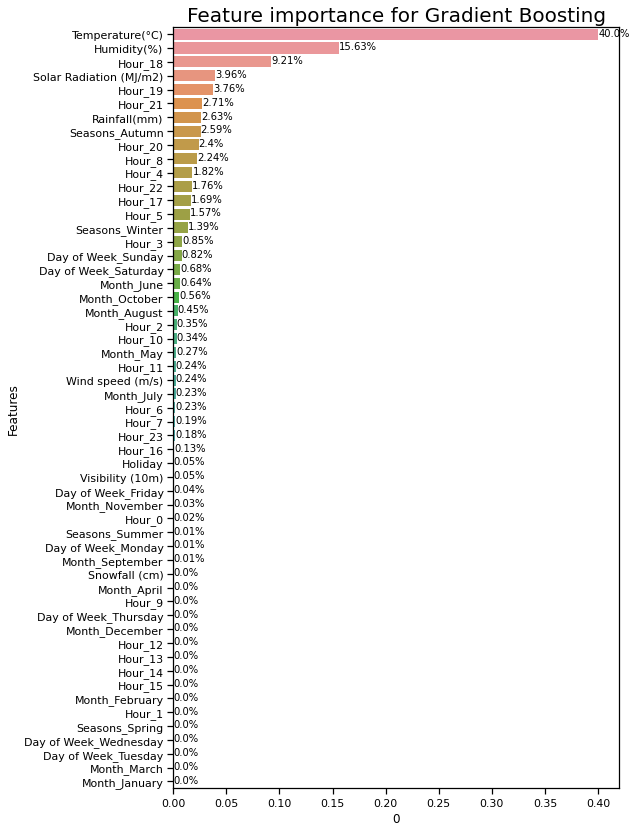

In [ ]:
cf = pd.DataFrame(data = regressor_gb.feature_importances_,columns=[0], index=X_train.columns).sort_values(by=0,ascending = False)
cf[0] = cf[0]/sum(cf[0])
plt.figure(figsize = (8,14))
plt.title('Feature importance for Gradient Boosting',fontsize = 20)
plt.xlabel('Feature importance in %')
plt.ylabel('Features')
ax = sns.barplot(data = cf, x=cf[0], y= cf.index)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()*100), 2))+'%', fontsize=10)

**INFERENCE:** Gradient Boosting has performed descently, better than Tuned Decision Tree but worse than Random Forest as it explains around 82% of the variation in data. RMSE is around 259 and MAE is around 183.

Most important features are Temperature(40%), Humidity(15%) and Hour_18(9%) just like previous algorithms although the values are different.

## XGBoost

Implementing XGBoost model which is another variation of Gradient Boosting.

In [ ]:
# XGBoost model created
regressor_xgb = XGBRegressor()

In [ ]:
# model fit to train data
regressor_xgb.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [ ]:
# making predictions on test data
y_pred_xgb = regressor_xgb.predict(X_test)

In [ ]:
# comparing predicted and test values
y_pred_xgb[:10],y_test[:10]

(array([  62.573315 ,  525.6225   ,  511.28806  ,   -3.1518748,
         209.49937  ,  907.7891   ,  429.59332  ,  202.60326  ,
        1537.9675   ,  356.9194   ], dtype=float32),       Rented Bike Count
 651                  86
 6951                222
 1815                461
 989                  42
 1916                213
 6745               1001
 44                  359
 1270                170
 5224               1635
 3534                427)

In [ ]:
# performance of XGBoost model
metric_df.iloc[9] = [mean_squared_error(y_test,y_pred_xgb),np.sqrt(mean_squared_error(y_test,y_pred_xgb)),mean_absolute_error(y_test,y_pred_xgb),
                  r2_score(y_test, y_pred_xgb),1-(1-r2_score((y_test), (y_pred_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))]

In [ ]:
metric_df.iloc[9]

Mean Squared Error         37241.231662
Root Mean Squared Error      192.979874
Mean Absolute Error          119.751611
R-squared score                  0.9077
Adjusted R-squared             0.905237
Name: XGBoost, dtype: object

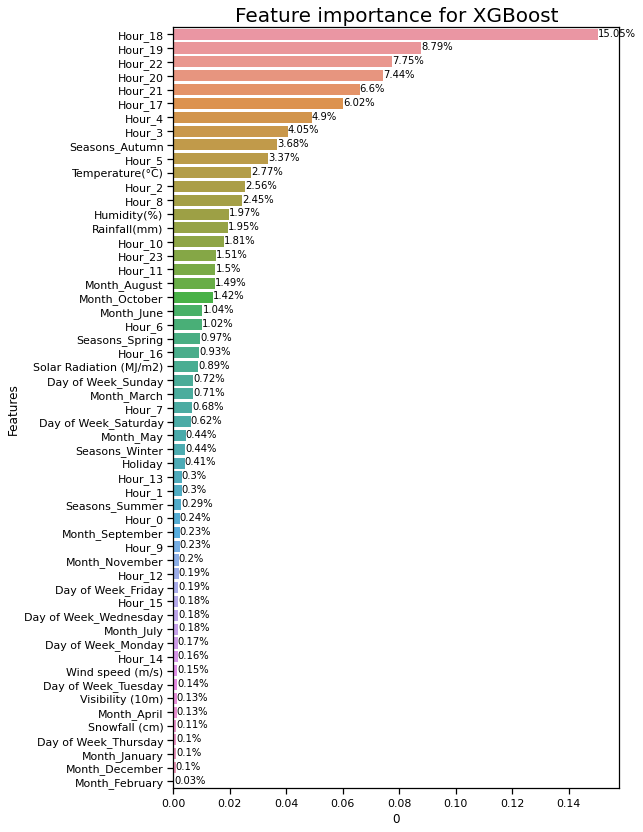

In [ ]:
feat_imp = regressor_xgb.get_booster().get_score(importance_type="gain")
cf= pd.DataFrame(feat_imp, index=[0]).T.sort_values(by=0,ascending = False)
cf[0] = cf[0]/sum(cf[0])
plt.figure(figsize = (8,14))
plt.title('Feature importance for XGBoost',fontsize = 20)
plt.xlabel('Feature importance in %')
plt.ylabel('Features')
ax = sns.barplot(data = cf, x=cf[0], y= cf.index)
for i in ax.patches:
    ax.text(i.get_width(), i.get_y()+0.5, str(round((i.get_width()*100), 2))+'%', fontsize=10)

**INFERENCE:** XGBoost has also performed excellently well, explaining more than 90% of variation in data. RMSE and MAE are also at lowest values of 192 and 119 respectively.

The feature importance plot is however different from other algorithms with most important features being the evening hours like Hour_18(15%), Hour_19(9%),etc. Numeric features like Temperature and Humidity are given lesser importance.

## Conclusion

In [ ]:
metric_df

Mean Squared Error  \
Linear Regression                              128607.837705   
Lasso Regularized Linear Regression             128689.22519   
Ridge Regularized Linear Regression            128975.971076   
Elastic Net Regularized Linear Regression       129086.36108   
Decision Tree                                   81909.798299   
Tuned Decision Tree                             71873.392073   
Random Forest                                   46479.115914   
Tuned Random Forest                             45921.547969   
Gradient Boosting                               67456.090752   
XGBoost                                         37241.231662   

                                          Root Mean Squared Error  \
Linear Regression                                      358.619349   
Lasso Regularized Linear Regression                    358.732805   
Ridge Regularized Linear Regression                    359.132247   
Elastic Net Regularized Linear Regression              359.285904   
Decision Tree                                          286.198879   
Tuned Decision Tree                                    268.092134   
Random Forest                                          215.590157   
Tuned Random Forest                                    214.293136   
Gradient Boosting                                      259.723104   
XGBoost                                                192.979874   

                                          Mean Absolute Error R-squared score  \
Linear Regression                                  270.226677        0.681255   
Lasso Regularized Linear Regression                270.204712        0.681054   
Ridge Regularized Linear Regression                270.542769        0.680343   
Elastic Net Regularized Linear Regression          270.618228        0.680069   
Decision Tree                                      164.897024        0.796993   
Tuned Decision Tree                                 157.14271        0.821867   
Random Forest                                      124.634766        0.884805   
Tuned Random Forest                                124.584299        0.886187   
Gradient Boosting                                  183.773253        0.832815   
XGBoost                                            119.751611          0.9077   

                                          Adjusted R-squared  
Linear Regression                                   0.672749  
Lasso Regularized Linear Regression                 0.672542  
Ridge Regularized Linear Regression                 0.671813  
Elastic Net Regularized Linear Regression           0.671532  
Decision Tree                                       0.791575  
Tuned Decision Tree                                 0.817114  
Random Forest                                       0.881731  
Tuned Random Forest                                  0.88315  
Gradient Boosting                                   0.828354  
XGBoost                                             0.905237

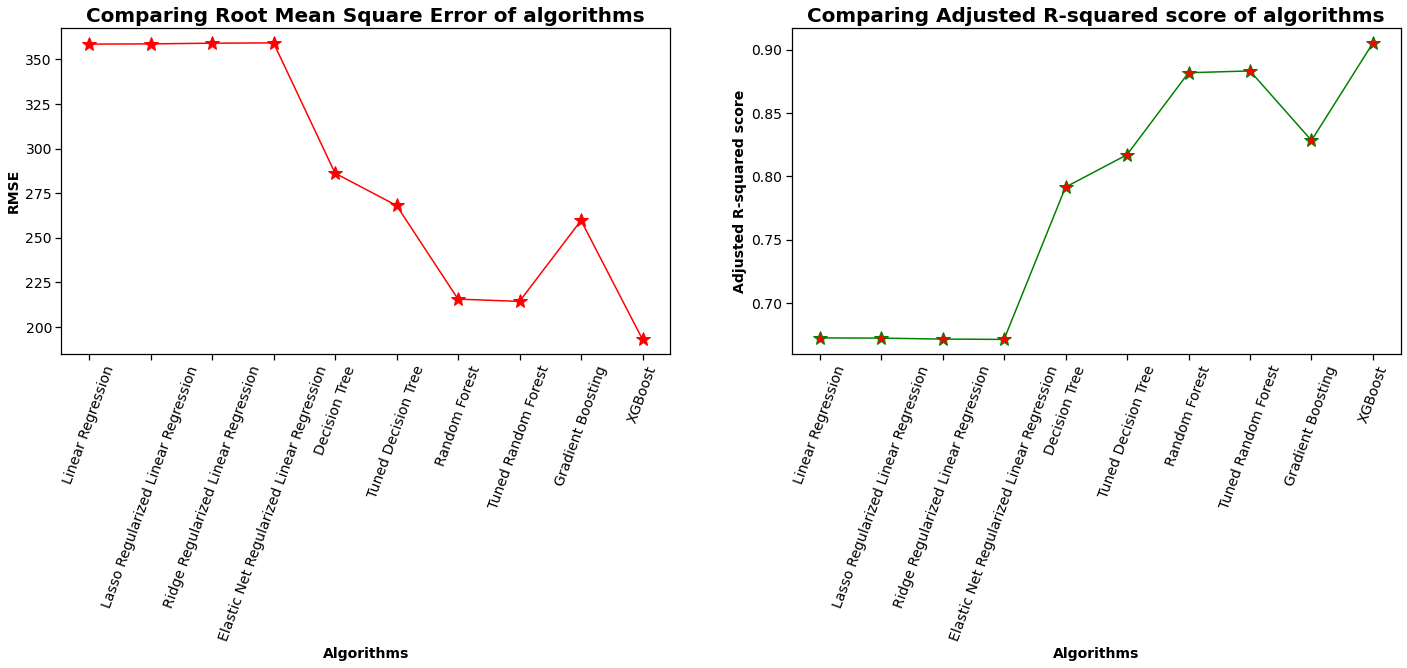

In [ ]:
# plotting RMSE and adjusted R-squared for all the models
plt.figure(figsize = (24,6))
plt.subplot(121)
ax = metric_df['Root Mean Squared Error'].plot(fontsize = 14,color = 'red',marker = '*', mfc = 'r', ms = 15)
plt.title('Comparing Root Mean Square Error of algorithms', fontsize = 20, fontweight='bold')
plt.xlabel('Algorithms', fontsize = 14, fontweight='bold')
plt.ylabel('RMSE', fontsize = 14, fontweight='bold')
plt.xticks(rotation=70)
ax.set_xticks(range(0,len(metric_df.index)),metric_df.index)
plt.subplot(122)
ax2 = metric_df['Adjusted R-squared'].plot(fontsize = 14,color = 'green',marker = '*', mfc = 'r', ms = 15)
plt.title('Comparing Adjusted R-squared score of algorithms', fontsize = 20, fontweight='bold')
plt.xlabel('Algorithms', fontsize = 14, fontweight='bold')
plt.ylabel('Adjusted R-squared score', fontsize = 14, fontweight='bold')
plt.xticks(rotation=70)
ax2.set_xticks(range(0,len(metric_df.index)),metric_df.index)
plt.show()

1. Xgboost model performs the best regression on the data explaining more than 90% of the variation in the data, followed by Random Forest which explains around 88% of the variations in the data. Decision Tree and Gradient Boosting performed descently explaining around 82% variation in the data. Linear Regression along with all regularization techniques failed to perform well.

2. Most of the algorihtms consider Temperature as the most important feature according to their feature importance plot. However, the best performing algorithm (XGBoost) considers the evening hour variables as the most important feature. Further XGBoost is the only algorithm which has given such a less (15%) importance to its most important feature whereas other algorithms have more than 35% importance to its most important features. Another thing to note is that XGBoost's feature importance plot is fairly distributed meaning the lowest important features have also been given importance. 

3. From EDA we conclude that, people rent bikes mostly on working days, mainly during the office hours of morning and evening hours as it touches peak in around 6 PM. People avoided using bikes in winter and summer had most bikes rented with peak in the month of June.